In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Activation
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
import json
import glob
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import BatchNormalization



from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
def read_data(file_name_json):
  '''
  file_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  test = []
  j=0
  json_files = glob.glob(file_name_json)
  #print(len(json_files))
  limit = len(json_files)-(len(json_files)%10)
  for jfile in json_files:
    if j < limit:
      j = j + 1
      with open(jfile) as f:
        data = json.load(f)
        if data['people']:
          kp= data['people'][0]['pose_keypoints_2d']
          kp = [kp[i] for i in range(0, 74) if (i+1) % 3 != 0]
          test.append(kp)
  x = int(len(test)/10)
  X_predict = np.asarray(test)
  print(X_predict.shape)
  ans = X_predict.shape[0]%10
  if X_predict.shape[0]%10 != 0:
    X_predict = X_predict[:-ans, :]
  print(X_predict.shape)
  test = test[: len(test) - ans]
  X_predict = X_predict.reshape(x, 10, 50)
  return X_predict, len(test)

In [5]:
##LOAD THE SAVED MODEL##
model1 = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission10_1/model_submit10_final1.hdf5')
model2 = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission10_2/model_submit10_final2.hdf5')
model3 = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission10_3/model_submit10_final3.hdf5')
model4 = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission10_4/model_submit10_final4.hdf5')

In [6]:
weights1 = model1.get_weights()
weights2 = model2.get_weights()
weights3 = model3.get_weights()
weights4 = model4.get_weights()

In [7]:
modela = tf.keras.models.Sequential()
modela.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modela.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modela.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modela.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modela.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modela.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
modela.add(tf.keras.layers.LSTM(500, return_sequences=True))
modela.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
modela.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

modela.set_weights(weights1)
adam = tf.keras.optimizers.Adam(lr = 0.0001)
modela.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
#print(model1.summary())

In [8]:
modelb = tf.keras.models.Sequential()
modelb.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modelb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True)))
modelb.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modelb.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True)))
modelb.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
modelb.add(tf.keras.layers.LSTM(500, return_sequences=True))
modelb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
modelb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

modelb.set_weights(weights2)
adam = tf.keras.optimizers.Adam(lr = 0.0001)
modelb.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])

In [9]:
modelc = tf.keras.models.Sequential()
modelc.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelc.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modelc.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelc.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modelc.add(tf.keras.layers.Conv1D(500, kernel_size=2, strides=1,activation='relu',input_shape=(10,50), padding='same'))
modelc.add(BatchNormalization())
modelc.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modelc.add(BatchNormalization())
modelc.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
modelc.add(tf.keras.layers.LSTM(500, return_sequences=True))
modelc.add(BatchNormalization())
modelc.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
modelc.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

modelc.set_weights(weights3)
adam = tf.keras.optimizers.Adam(lr = 0.0001)
modelc.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])

In [10]:
modeld = tf.keras.models.Sequential()
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
modeld.add(tf.keras.layers.Conv1D(500, kernel_size=2, strides=1,activation='relu',input_shape=(10,50), padding='same'))
modeld.add(BatchNormalization())
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
modeld.add(BatchNormalization())
modeld.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
modeld.add(tf.keras.layers.LSTM(500, return_sequences=True))
modeld.add(tf.keras.layers.LSTM(500, return_sequences=True))
modeld.add(BatchNormalization())
modeld.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
modeld.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

modeld.set_weights(weights4)
adam = tf.keras.optimizers.Adam(lr = 0.0001)
modeld.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])

In [11]:
#PREDICT THE MODEL#
def predict(file_name_json):
  X_predict, num_frames = read_data(file_name_json)
  
  
  ypre1 = modela.predict(X_predict)
  ypre1=ypre1.flatten()
  
  ypre2 = modelb.predict(X_predict)
  ypre2=ypre2.flatten()

  ypre3 = modelc.predict(X_predict)
  ypre3=ypre3.flatten()

  ypre4 = modeld.predict(X_predict)
  ypre4=ypre4.flatten()
  
  ypre = (0.25 * ypre1) + (0.25 * ypre2) + (0.25 * ypre3) + (0.25 * ypre4)

  df = pd.DataFrame(ypre) 
  rolling = df.rolling(window=10)
  rolling_mean = rolling.mean()
  fps = 30
  x = np.linspace(0,num_frames/fps,num_frames)
  plt.figure(1)
  plt.plot(x, ypre)
  plt.axhline(y=0.5, color='r', linestyle='-')
  plt.ylabel('label')
  plt.xlabel('time in seconds')
  plt.legend(['Actual predicted data'], loc='best' )
  plt.ylim([0,1.2])
  plt.title('Prediction Output For Sample Videos')
  plt.show()

(60, 50)
(60, 50)


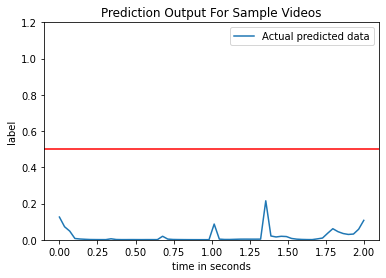

In [12]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial1/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


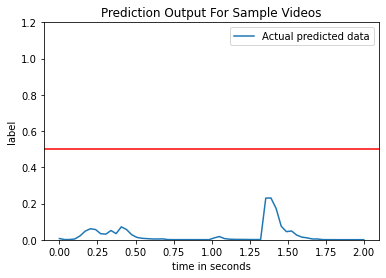

In [13]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial2/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


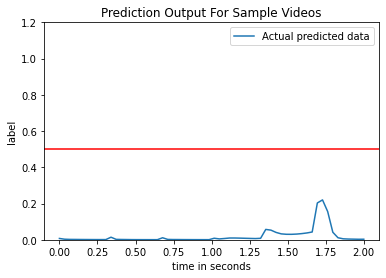

In [14]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial3/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


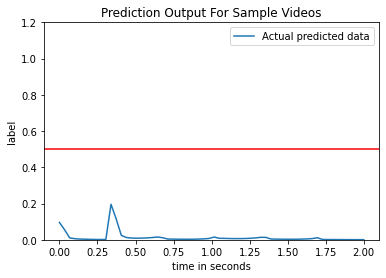

In [15]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial4/*'  #change json file for different test videos
predict(file_name_json)

(39, 50)
(30, 50)


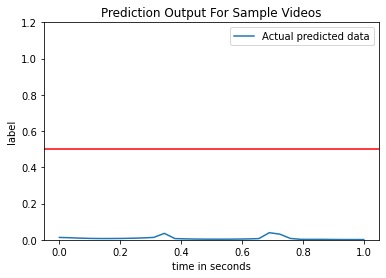

In [16]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial5/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


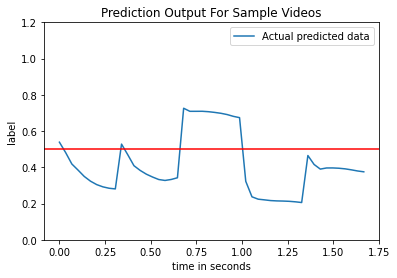

In [17]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial6/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


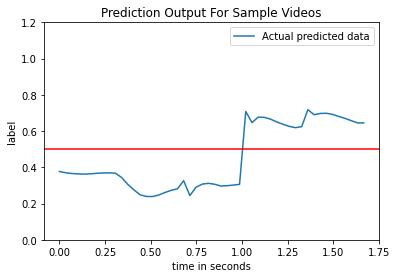

In [18]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial7/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


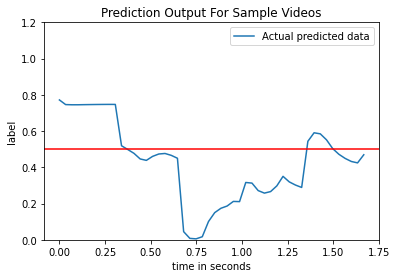

In [19]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial8/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


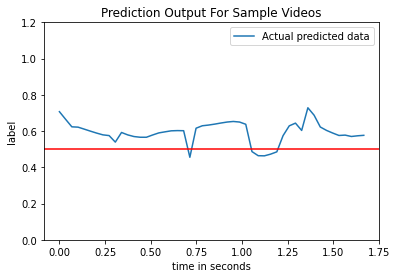

In [20]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial9/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


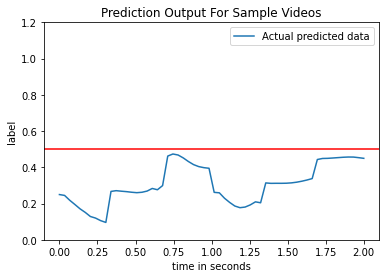

In [21]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial10/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


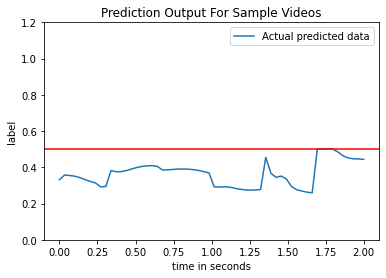

In [22]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial11/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


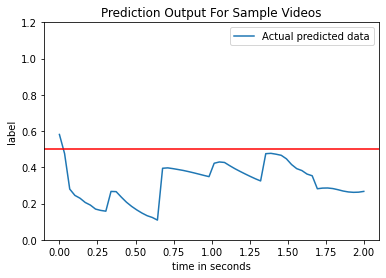

In [23]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial12/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


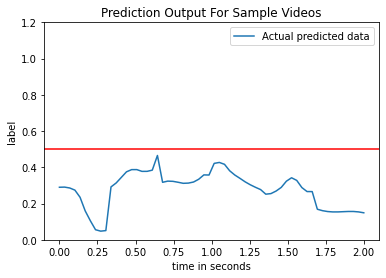

In [24]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial13/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


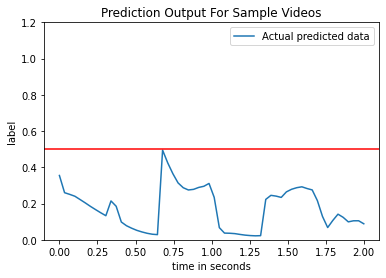

In [25]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial14/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


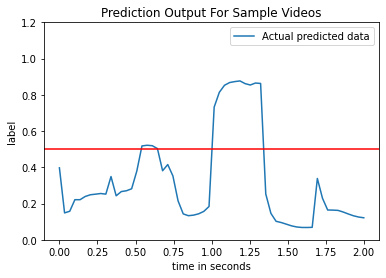

In [26]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial15/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


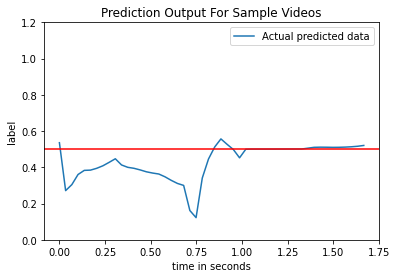

In [27]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial16/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


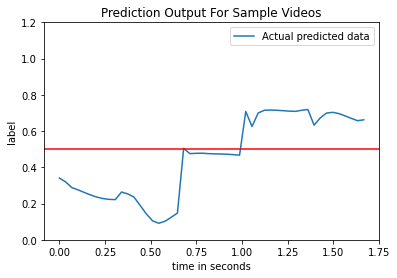

In [28]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial17/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


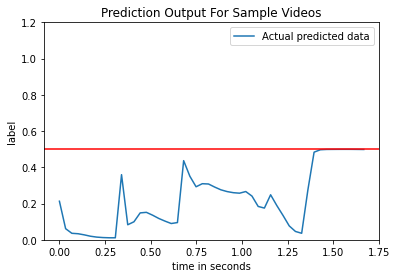

In [29]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial18/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


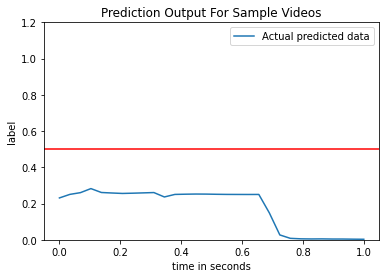

In [30]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial19/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


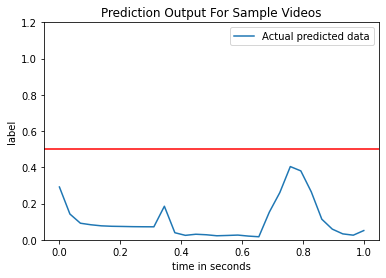

In [31]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial20/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


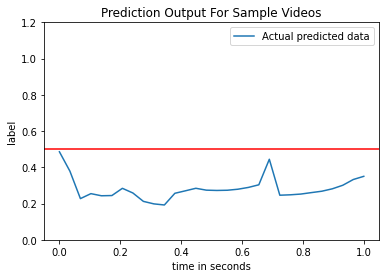

In [32]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial21/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


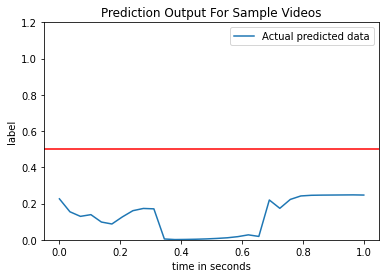

In [33]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial22/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


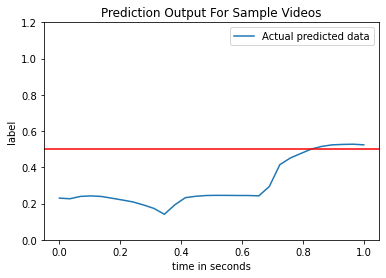

In [34]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial23/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


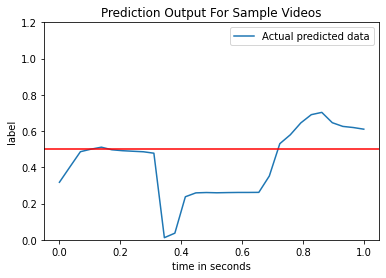

In [35]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial24/*'  #change json file for different test videos
predict(file_name_json)

(11, 50)
(10, 50)


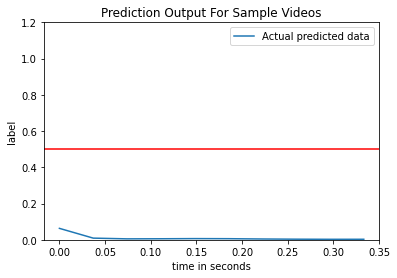

In [36]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial25/*'  #change json file for different test videos
predict(file_name_json)

(16, 50)
(10, 50)


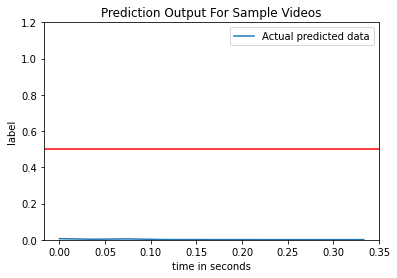

In [37]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial26/*'  #change json file for different test videos
predict(file_name_json)

(28, 50)
(20, 50)


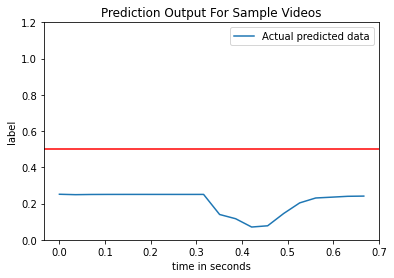

In [38]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial27/*'  #change json file for different test videos
predict(file_name_json)

(29, 50)
(20, 50)


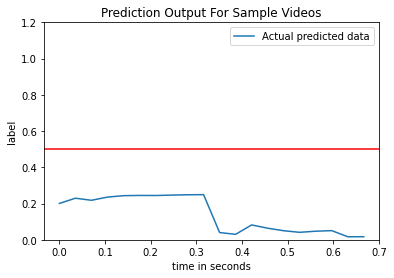

In [39]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial28/*'  #change json file for different test videos
predict(file_name_json)

(24, 50)
(20, 50)


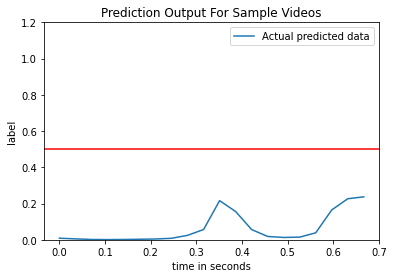

In [40]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial29/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


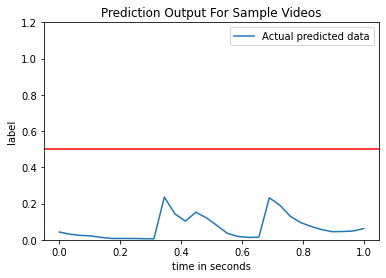

In [41]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial30/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


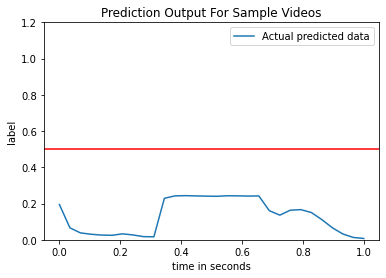

In [42]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial31/*'  #change json file for different test videos
predict(file_name_json)

(25, 50)
(20, 50)


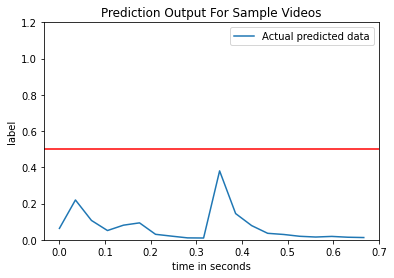

In [43]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial32/*'  #change json file for different test videos
predict(file_name_json)

In [44]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial33/*'  #change json file for different test videos
# predict(file_name_json)

In [45]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial34/*'  #change json file for different test videos
# predict(file_name_json)

In [46]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial35/*'  #change json file for different test videos
# predict(file_name_json)

In [47]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial36/*'  #change json file for different test videos
# predict(file_name_json)

In [48]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial37/*'  #change json file for different test videos
# predict(file_name_json)

(48, 50)
(40, 50)


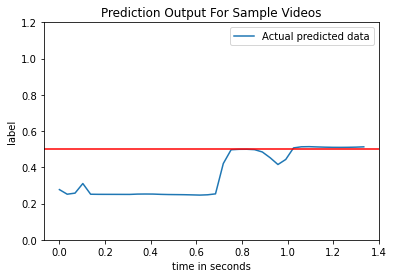

In [49]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial38/*'  #change json file for different test videos
predict(file_name_json)

(48, 50)
(40, 50)


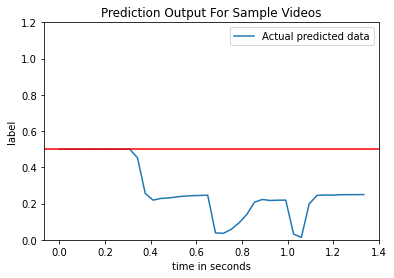

In [50]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial39/*'  #change json file for different test videos
predict(file_name_json)

In [51]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial40/*'  #change json file for different test videos
# predict(file_name_json)

In [52]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial41/*'  #change json file for different test videos
# predict(file_name_json)

(12, 50)
(10, 50)


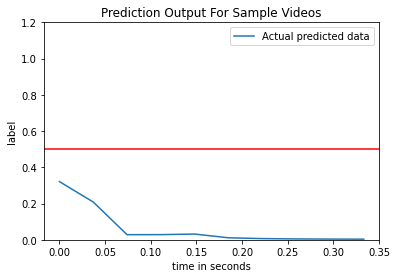

In [53]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial42/*'  #change json file for different test videos
predict(file_name_json)

(29, 50)
(20, 50)


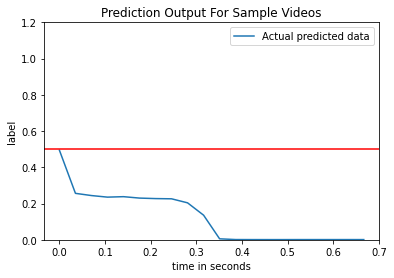

In [54]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial43/*'  #change json file for different test videos
predict(file_name_json)

In [55]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial44/*'  #change json file for different test videos
# predict(file_name_json)

In [56]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial45/*'  #change json file for different test videos
# predict(file_name_json)

(47, 50)
(40, 50)


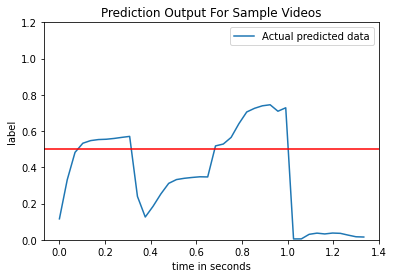

In [57]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial46/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


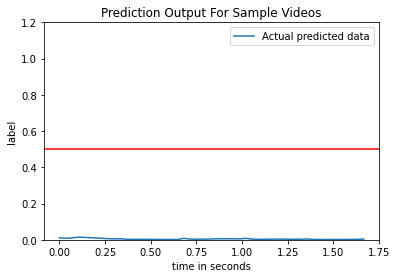

In [58]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial47/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


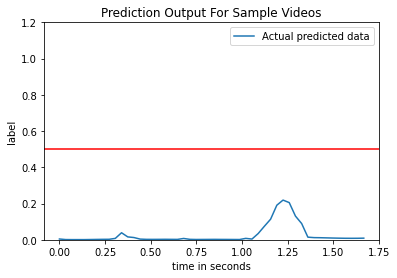

In [59]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial48/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


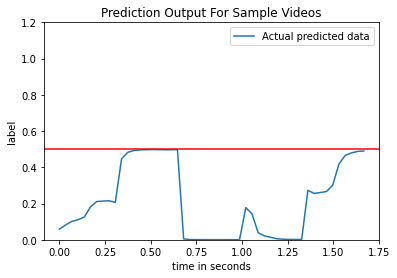

In [60]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial49/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


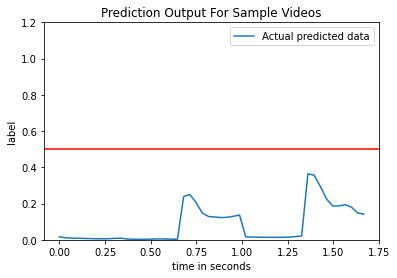

In [61]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial50/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


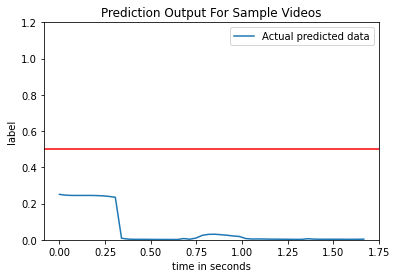

In [62]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial51/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


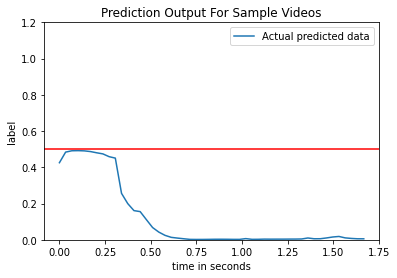

In [63]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial52/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


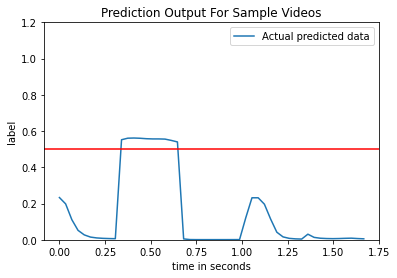

In [64]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial53/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


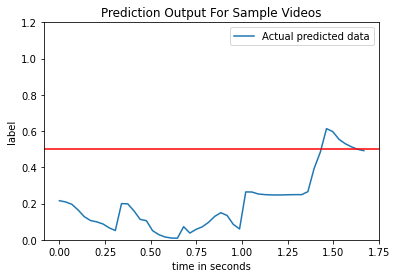

In [65]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial54/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


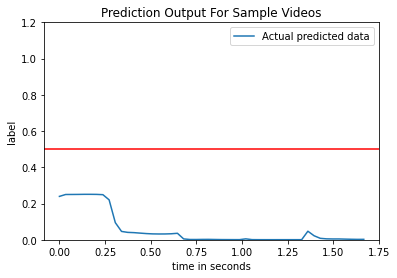

In [66]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial55/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


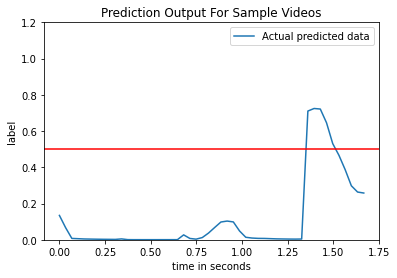

In [67]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial56/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


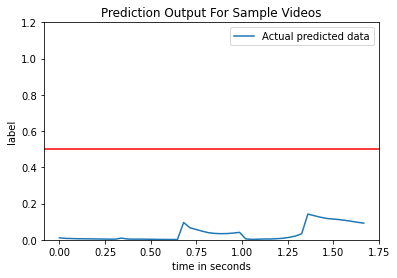

In [68]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial57/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


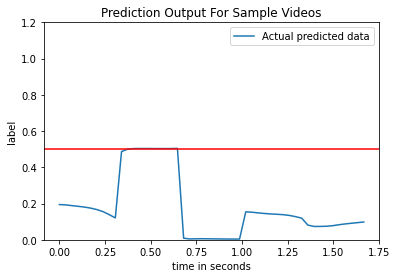

In [69]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial58/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


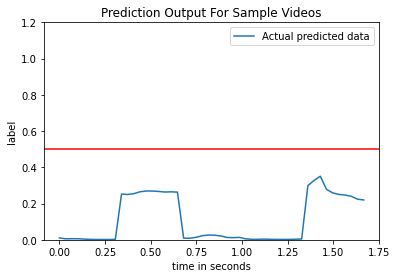

In [70]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial59/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


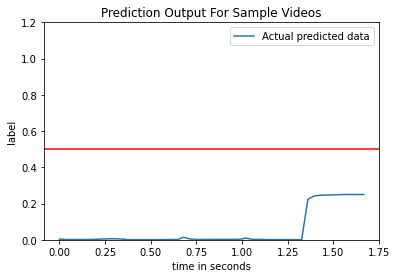

In [71]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial60/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


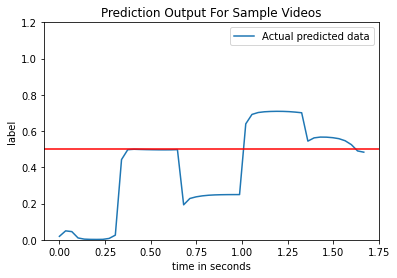

In [72]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial61/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


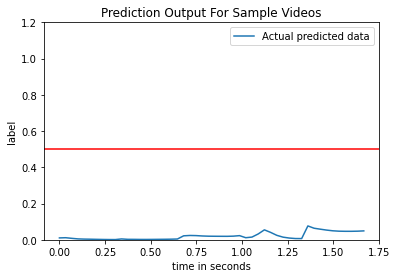

In [73]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial62/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


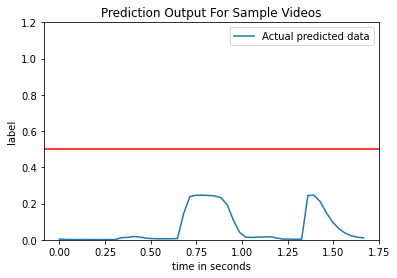

In [74]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial63/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


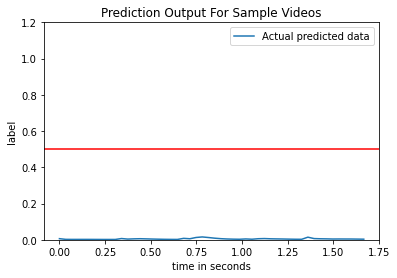

In [75]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial64/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


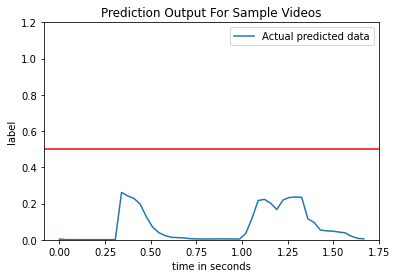

In [76]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial65/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


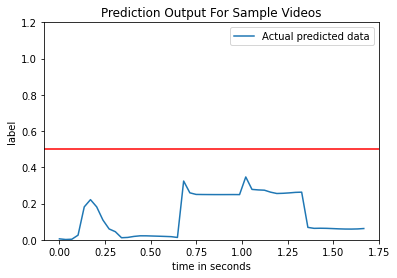

In [77]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial66/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


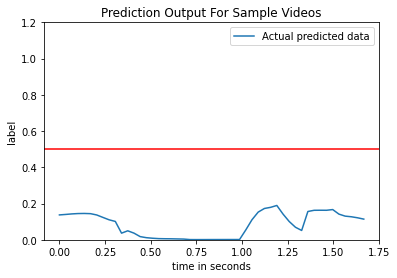

In [78]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial67/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


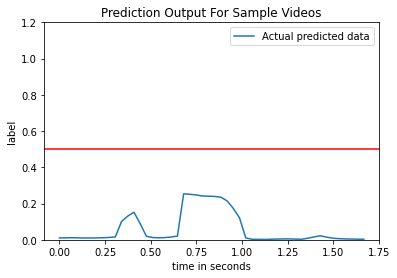

In [79]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial68/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


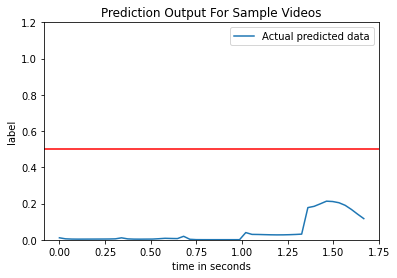

In [80]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial69/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


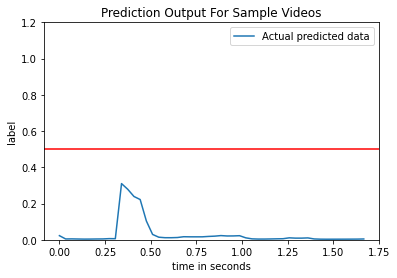

In [81]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial70/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


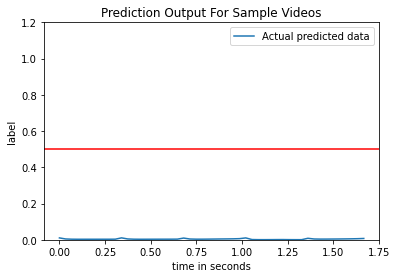

In [82]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial71/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


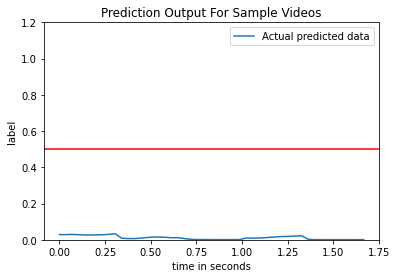

In [83]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial72/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


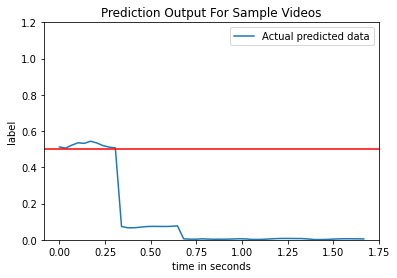

In [84]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial73/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


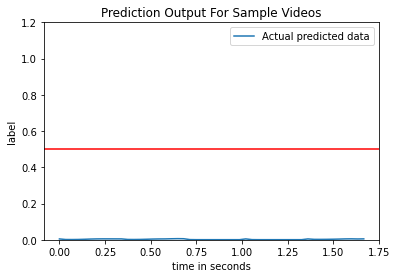

In [85]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial74/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


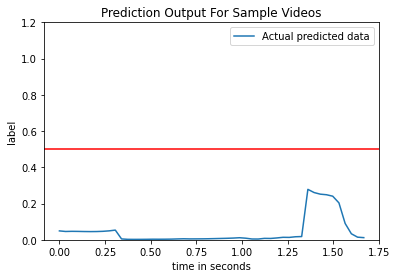

In [86]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial75/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


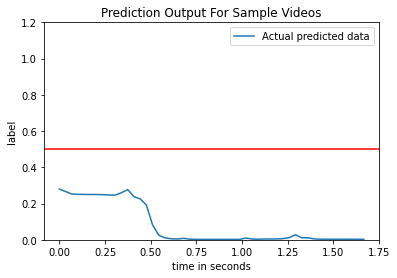

In [87]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial76/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


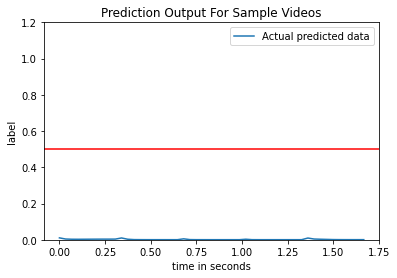

In [88]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial77/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


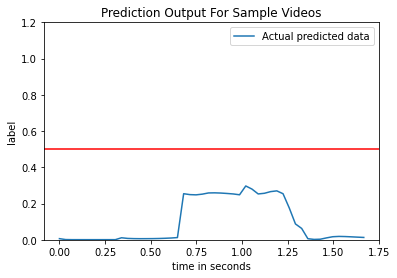

In [89]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial78/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


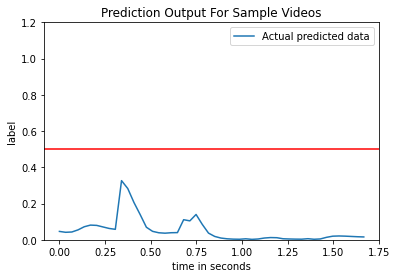

In [90]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial79/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


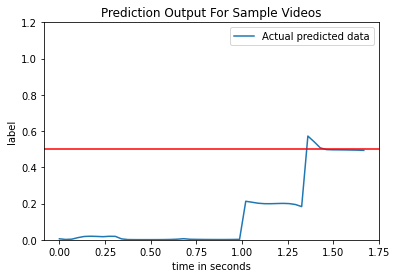

In [91]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial80/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


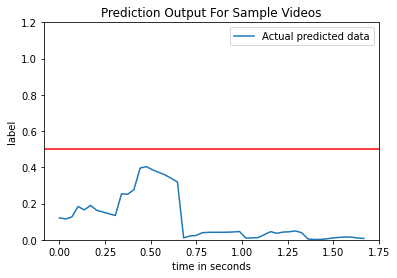

In [92]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial81/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


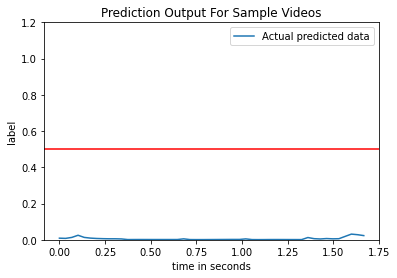

In [93]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial82/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


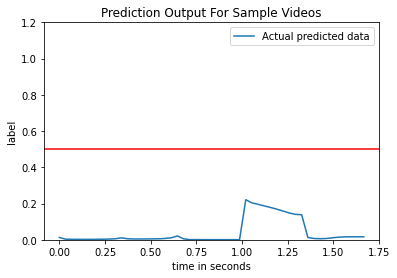

In [94]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial83/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


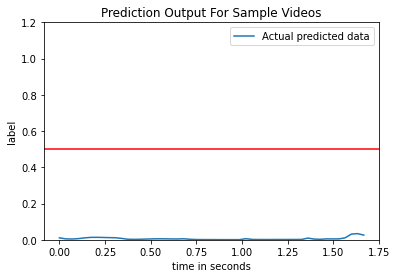

In [95]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial84/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


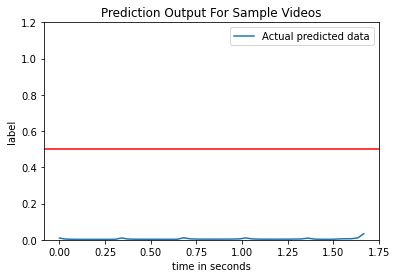

In [96]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial85/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


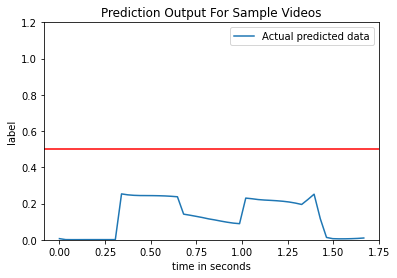

In [97]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial86/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


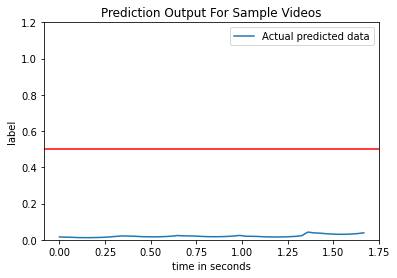

In [98]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial87/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


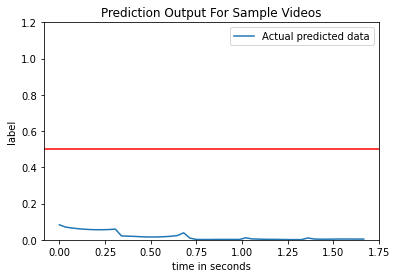

In [99]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial88/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


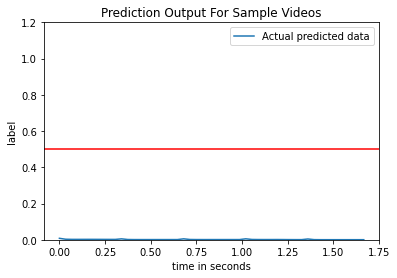

In [100]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial89/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


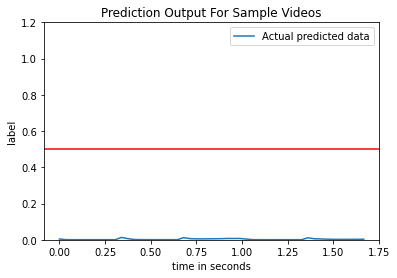

In [101]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial90/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


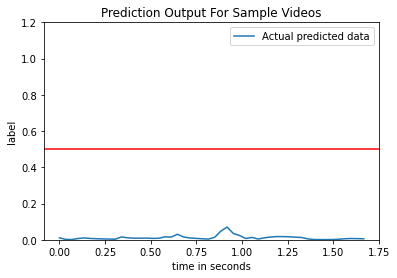

In [102]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial91/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


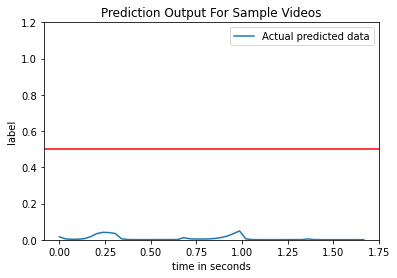

In [103]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial92/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


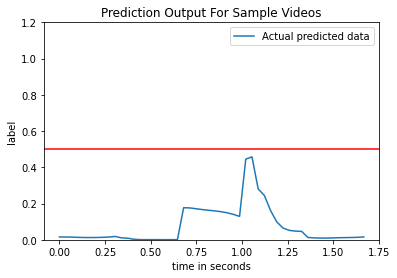

In [104]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial93/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


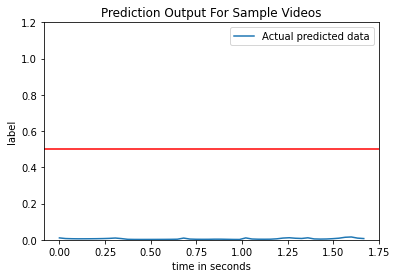

In [105]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial94/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


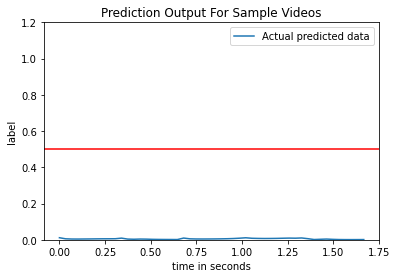

In [106]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial95/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


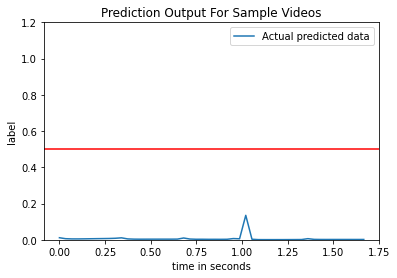

In [107]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial96/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


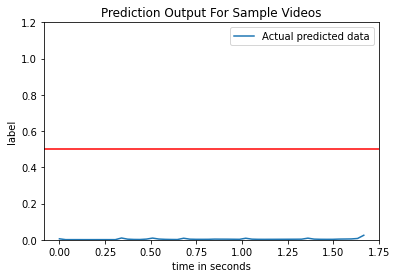

In [108]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial97/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


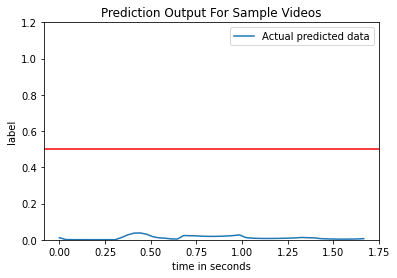

In [109]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial98/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


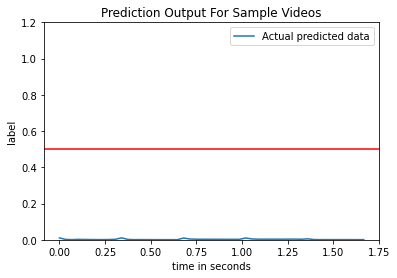

In [110]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial99/*'  #change json file for different test videos
predict(file_name_json)

In [112]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial100/*'  #change json file for different test videos
# predict(file_name_json)

(50, 50)
(50, 50)


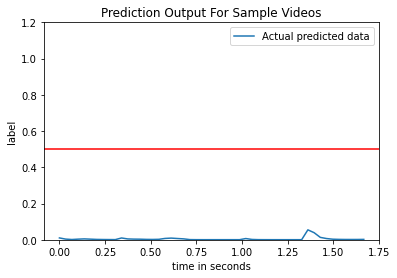

In [113]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial101/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


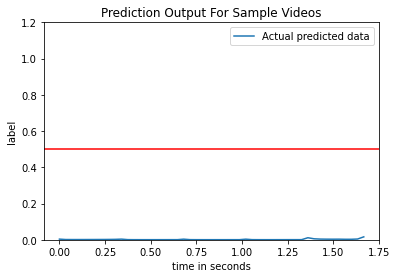

In [114]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial102/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


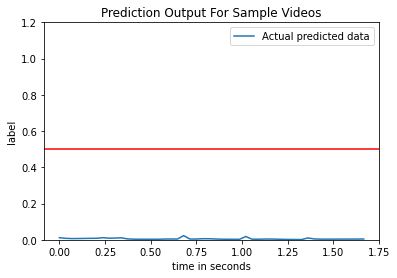

In [115]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial103/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


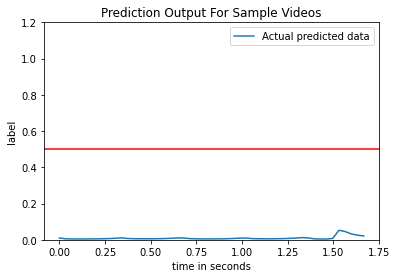

In [116]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial104/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


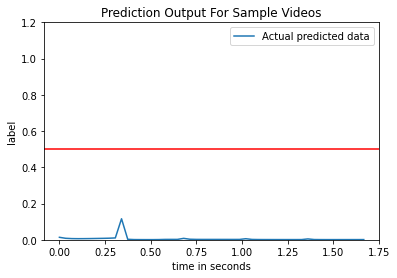

In [117]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial105/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


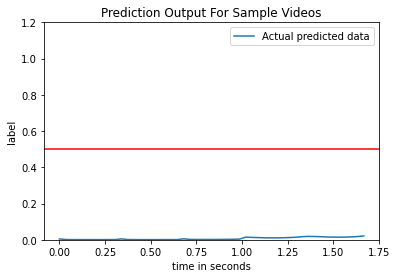

In [118]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial106/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


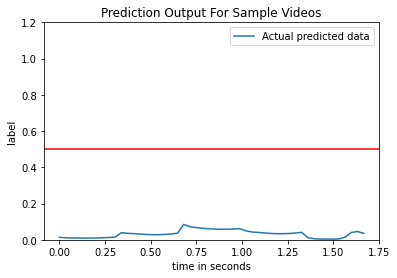

In [119]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial107/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


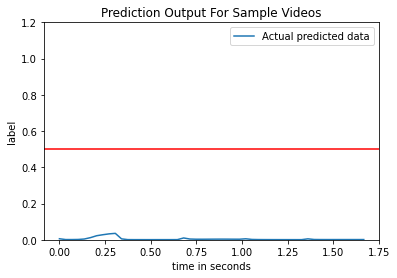

In [120]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial108/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


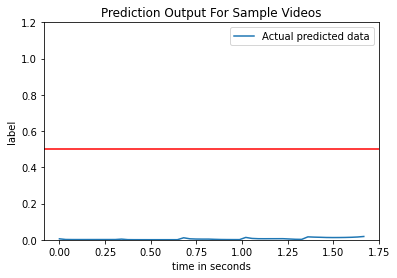

In [121]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial109/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


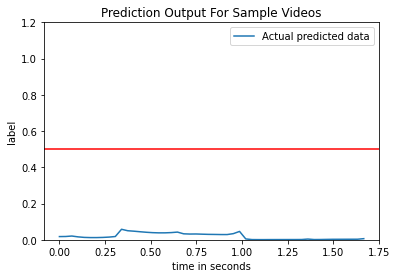

In [122]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial110/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


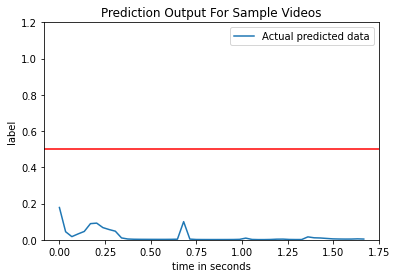

In [123]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial111/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


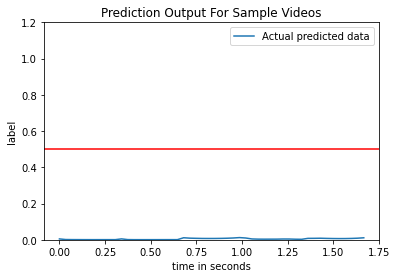

In [124]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial112/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


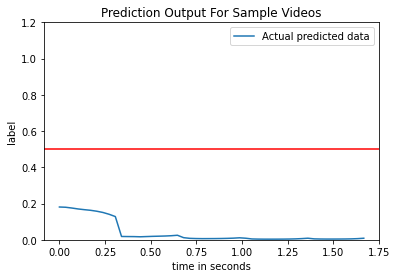

In [125]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial113/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


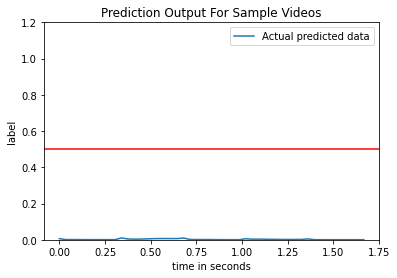

In [126]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial114/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


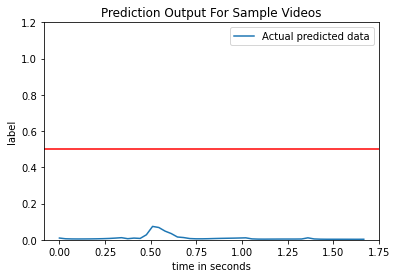

In [127]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial115/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


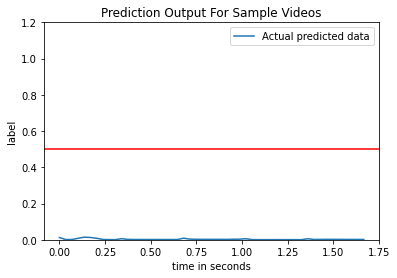

In [128]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial116/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


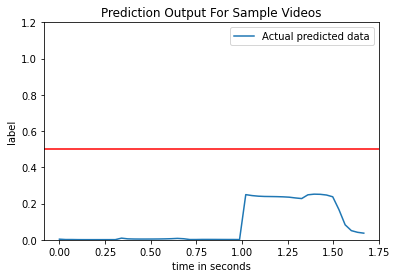

In [129]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial117/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


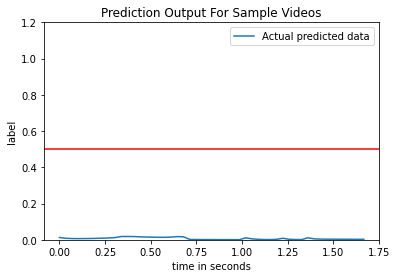

In [130]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial118/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


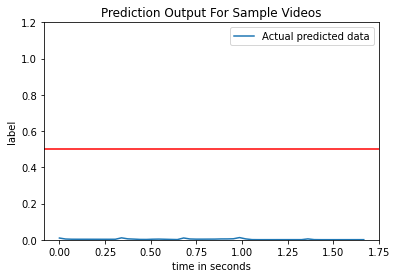

In [131]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial119/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


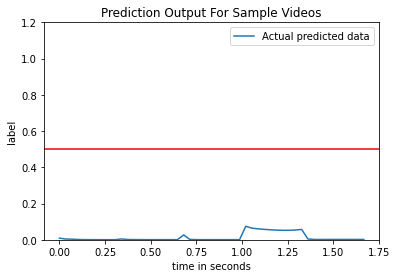

In [132]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial120/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


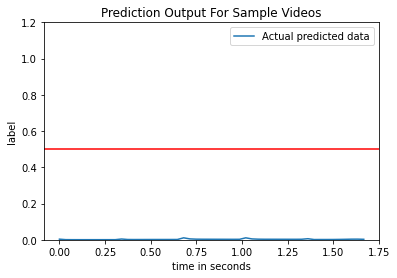

In [133]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial121/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


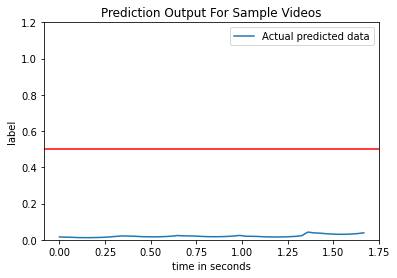

In [134]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial122/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


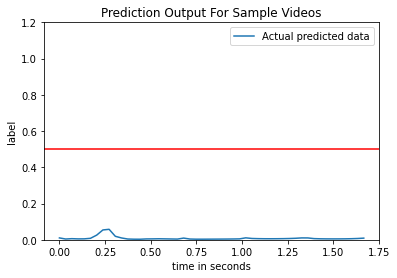

In [135]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial123/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


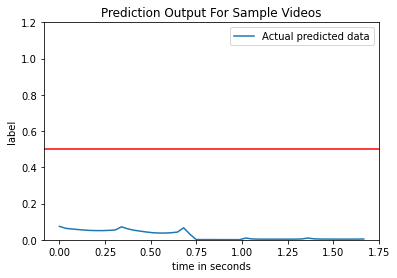

In [136]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial124/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


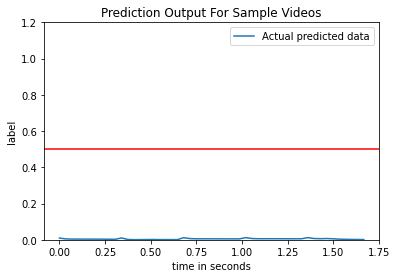

In [137]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial125/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


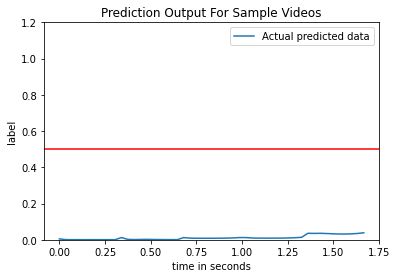

In [138]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial126/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


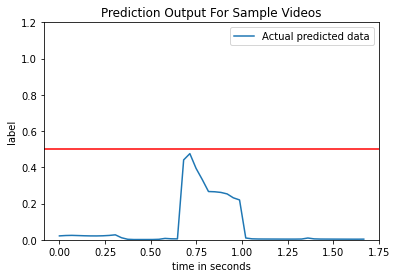

In [139]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial127/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


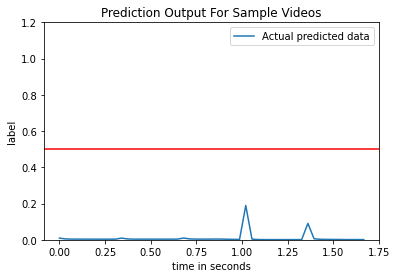

In [140]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial128/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


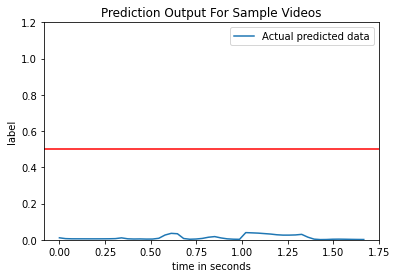

In [141]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial129/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


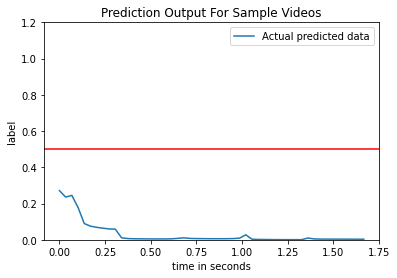

In [142]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial130/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


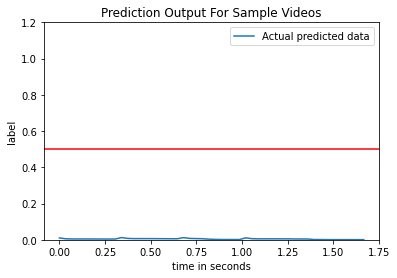

In [143]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial131/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


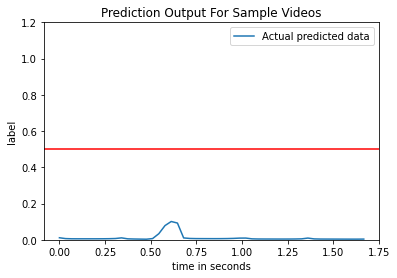

In [144]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial132/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


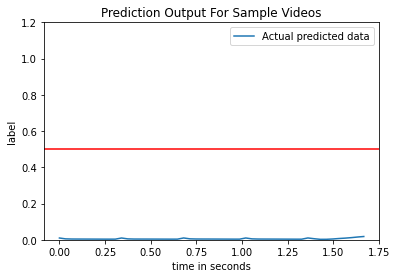

In [145]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial133/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


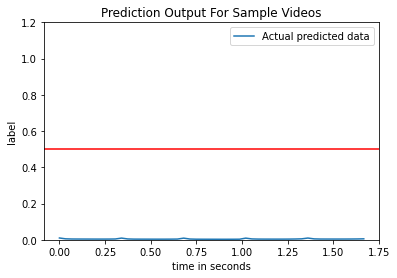

In [146]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial134/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


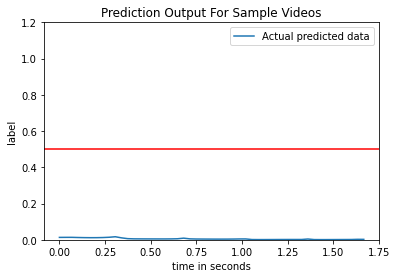

In [147]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial135/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


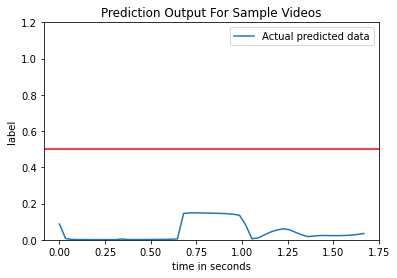

In [148]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial136/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


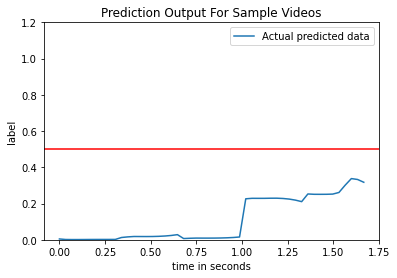

In [149]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial137/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


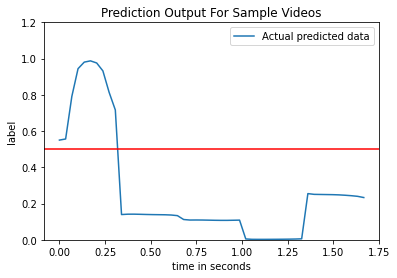

In [150]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial138/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


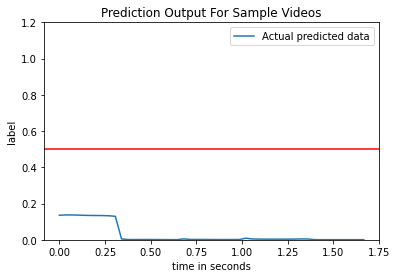

In [151]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial139/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


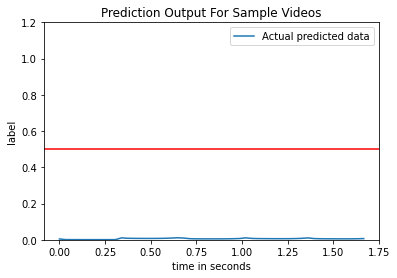

In [152]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial140/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


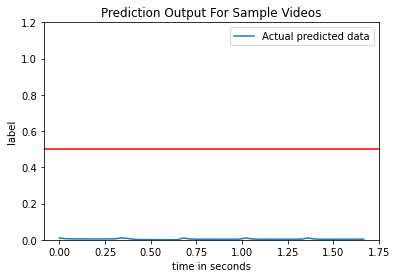

In [153]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial141/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


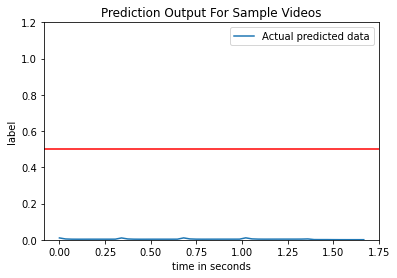

In [154]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial142/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


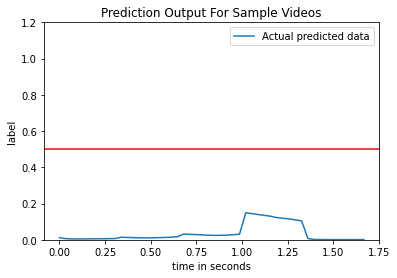

In [155]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial143/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


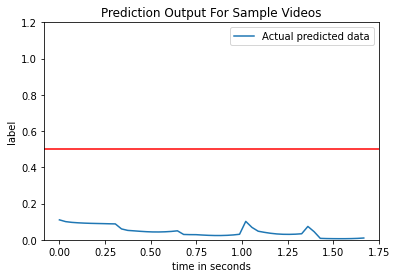

In [156]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial144/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


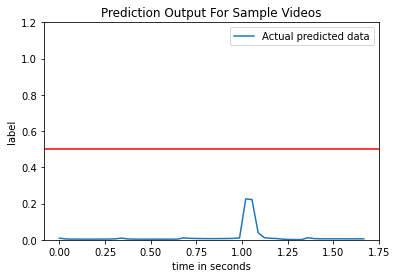

In [157]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial145/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


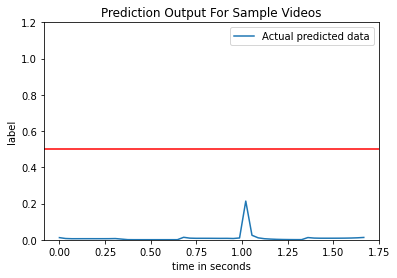

In [158]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial146/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


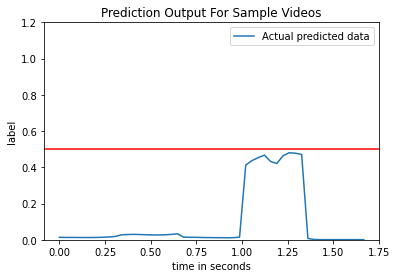

In [159]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial147/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


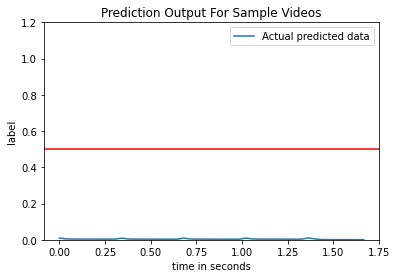

In [160]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial148/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


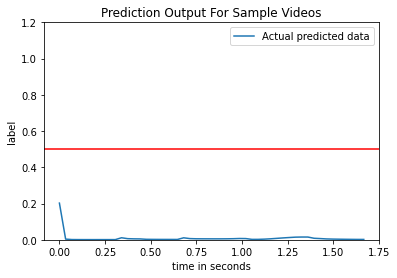

In [161]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial149/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


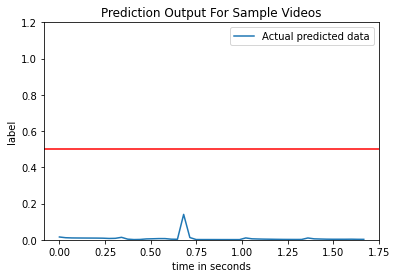

In [162]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial150/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


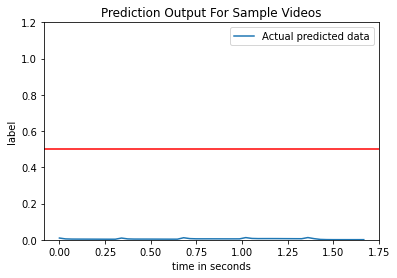

In [163]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial151/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


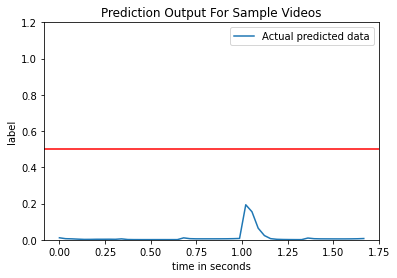

In [164]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial152/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


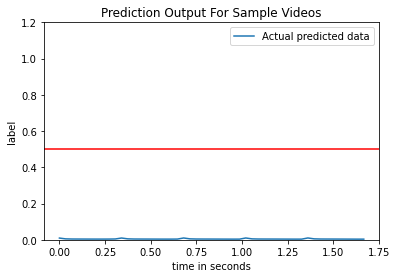

In [165]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial153/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


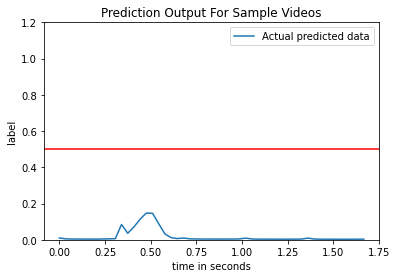

In [166]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial154/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


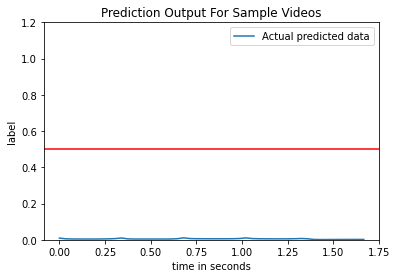

In [167]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial155/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


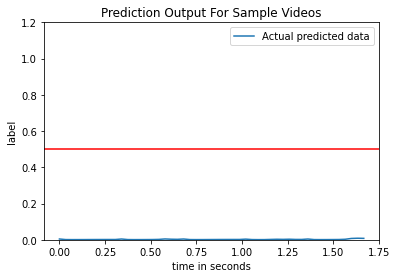

In [168]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial156/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


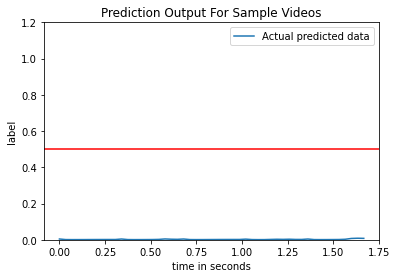

In [169]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial157/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


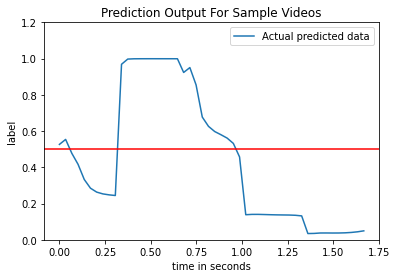

In [170]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial158/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


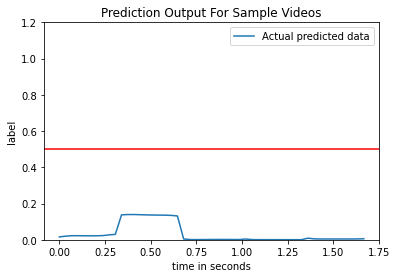

In [171]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial159/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


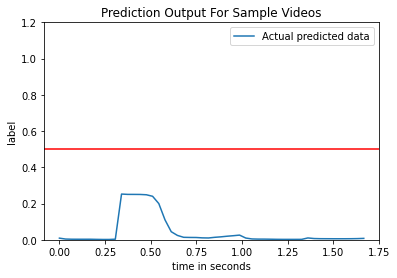

In [172]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial160/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


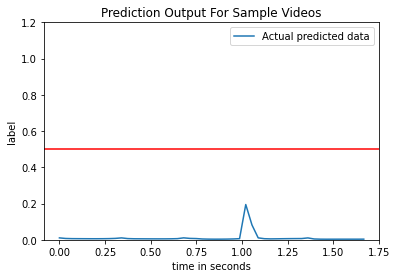

In [173]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial161/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


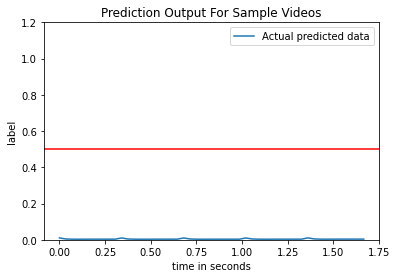

In [174]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial162/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


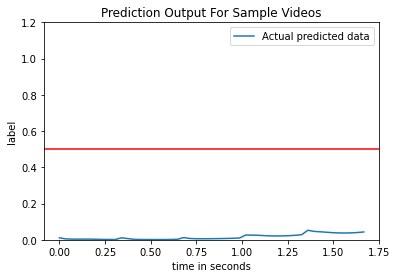

In [175]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial163/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


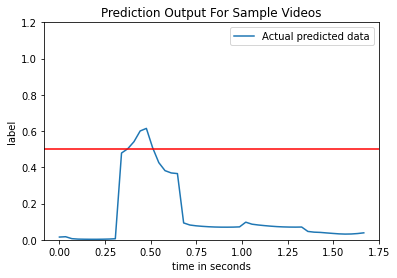

In [176]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial164/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


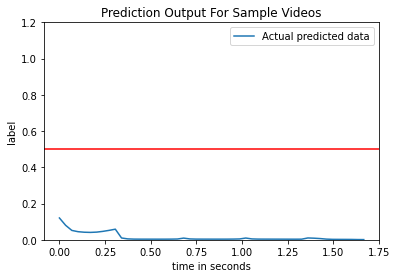

In [177]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial165/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


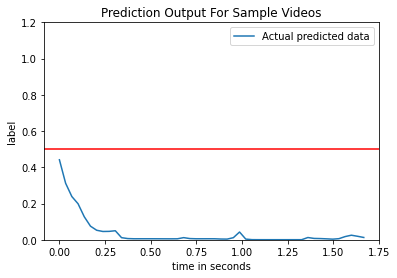

In [178]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial166/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


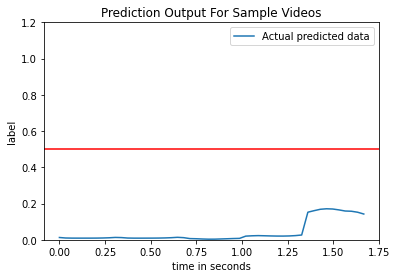

In [179]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial167/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


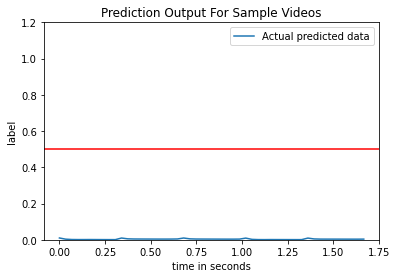

In [180]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial168/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


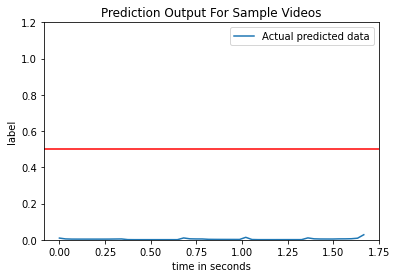

In [181]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial169/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


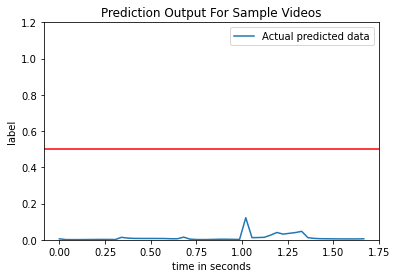

In [182]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial170/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


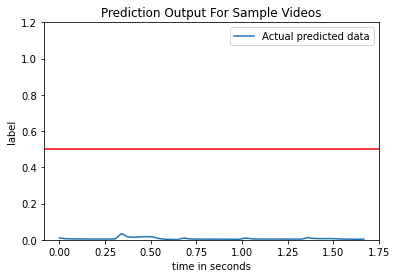

In [183]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial171/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


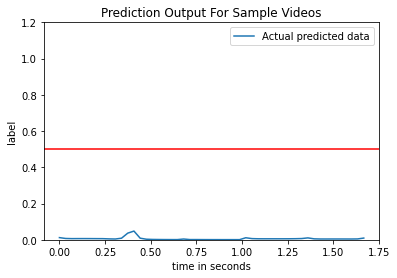

In [184]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial172/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


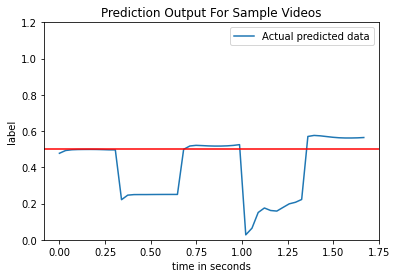

In [185]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial173/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


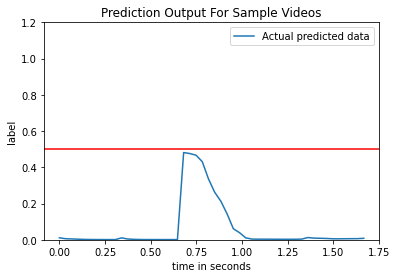

In [186]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial174/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


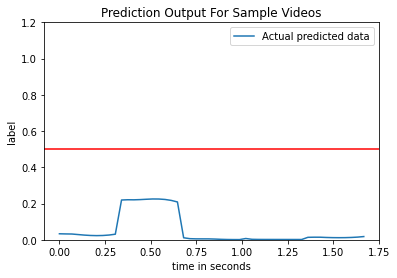

In [187]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial175/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


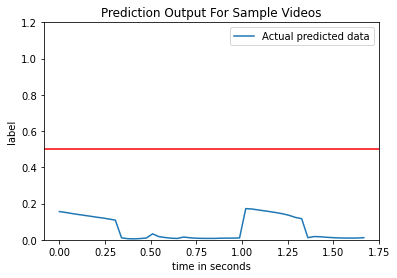

In [188]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial176/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


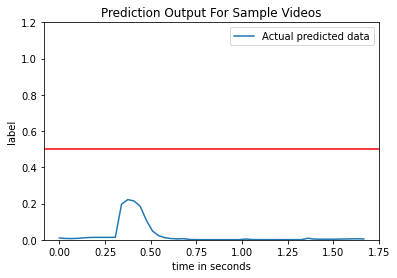

In [189]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial177/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


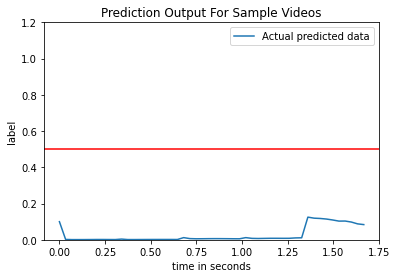

In [190]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial178/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


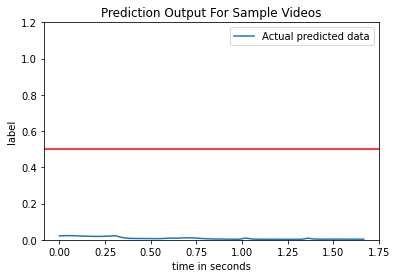

In [191]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial179/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


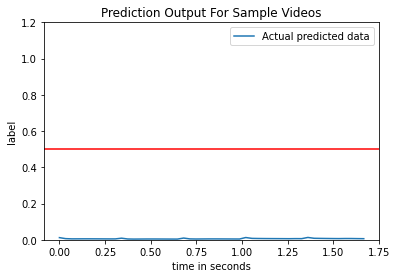

In [192]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial180/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


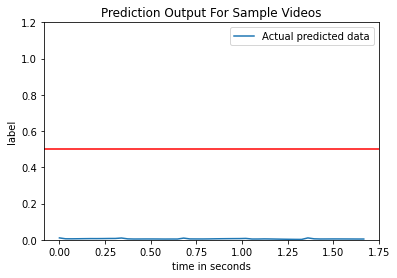

In [193]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial181/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


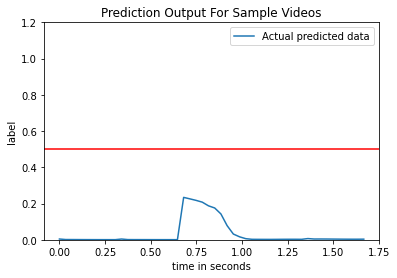

In [194]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial182/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


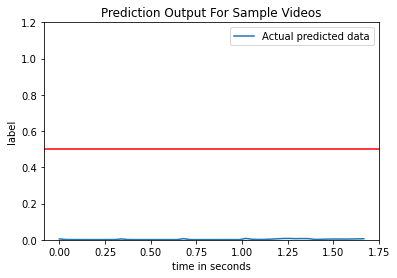

In [195]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial183/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


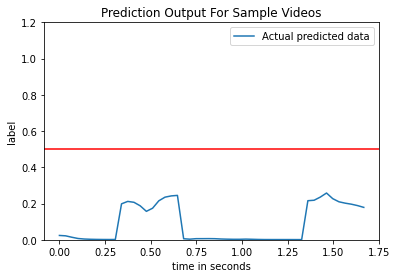

In [196]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial184/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


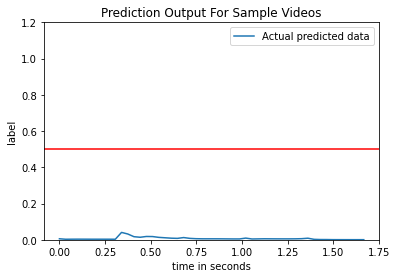

In [197]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial185/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


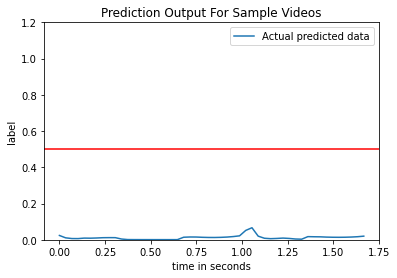

In [198]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial186/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


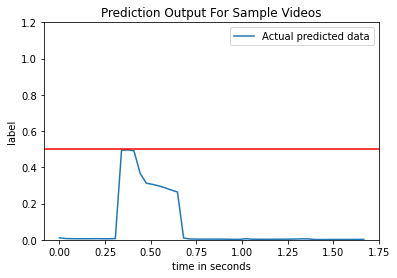

In [199]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial187/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


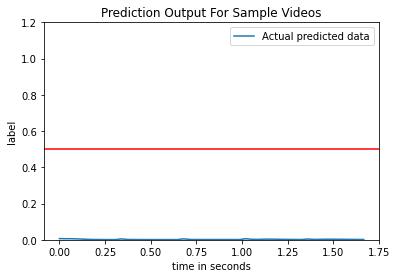

In [200]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial188/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


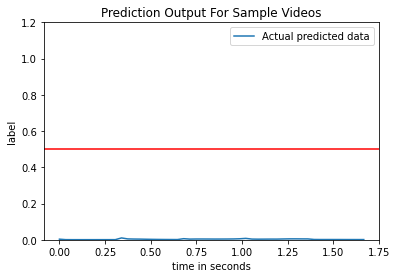

In [201]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial189/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


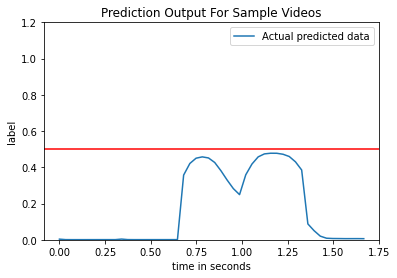

In [202]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial190/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


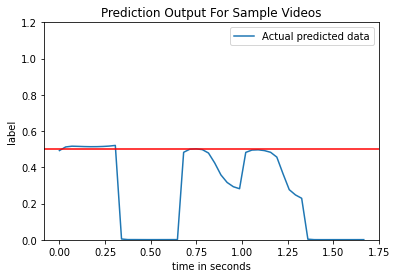

In [203]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial191/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


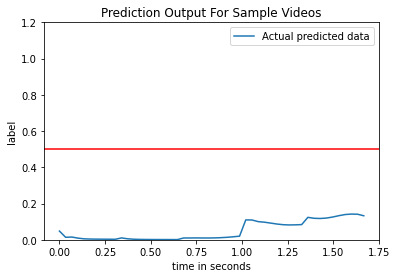

In [204]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial192/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


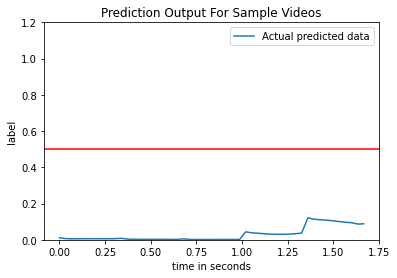

In [205]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial193/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


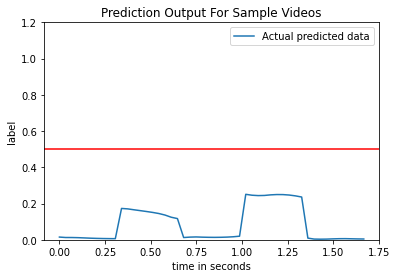

In [206]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial194/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


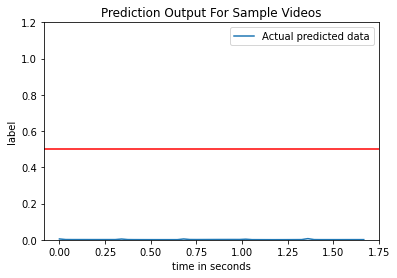

In [207]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial195/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


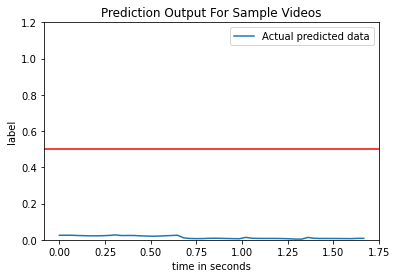

In [208]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial196/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


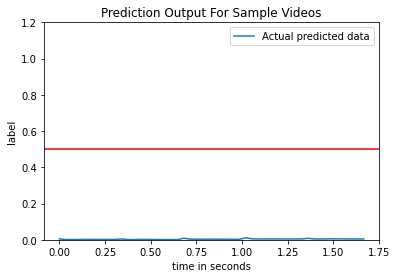

In [209]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial197/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


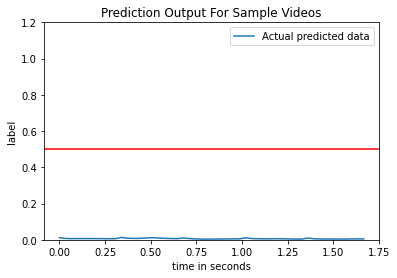

In [210]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial198/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


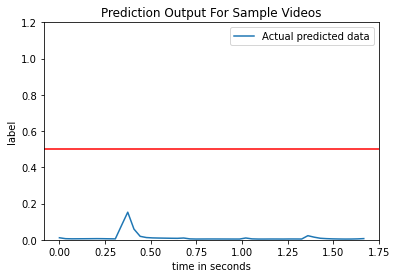

In [211]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial199/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


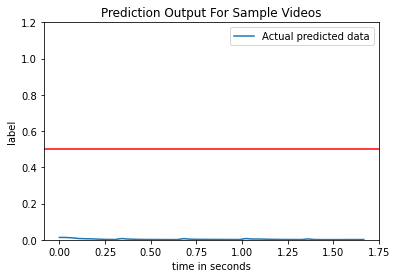

In [212]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial200/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


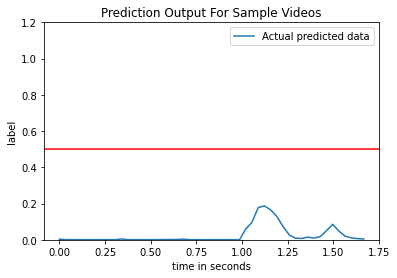

In [213]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial201/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


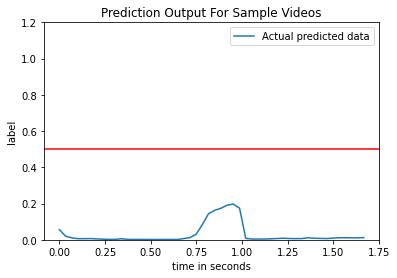

In [214]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial202/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


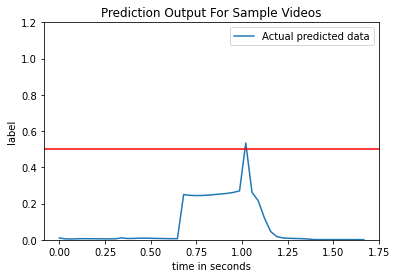

In [215]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial203/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


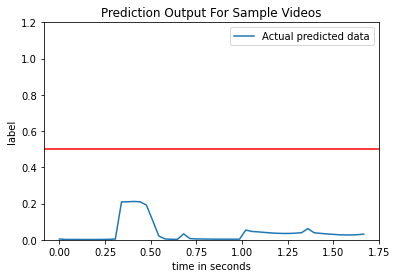

In [216]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial204/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


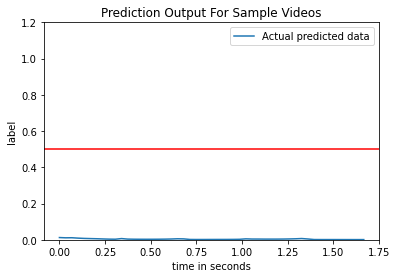

In [217]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial205/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


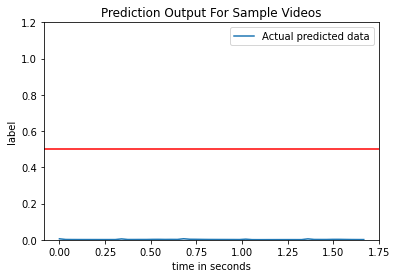

In [218]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial206/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


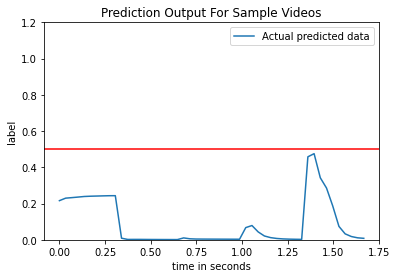

In [219]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial207/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


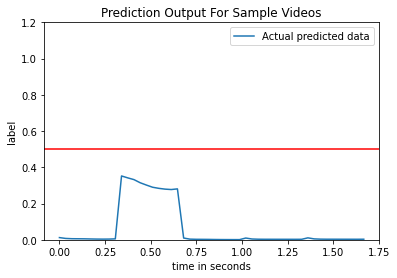

In [220]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial208/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


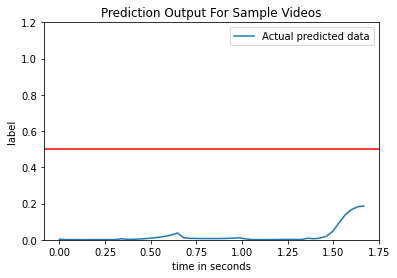

In [221]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial209/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


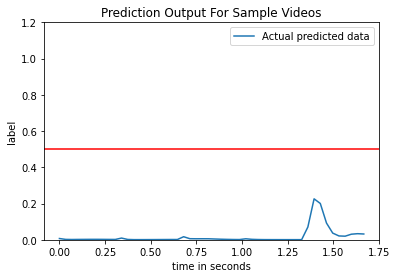

In [222]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial210/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


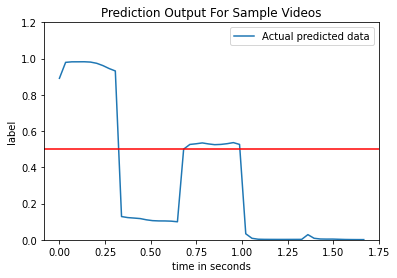

In [223]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial211/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


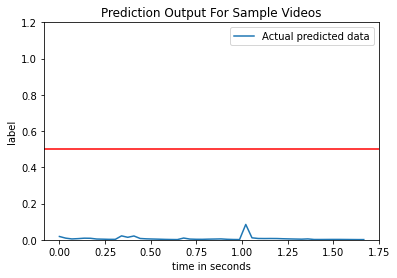

In [224]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial212/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


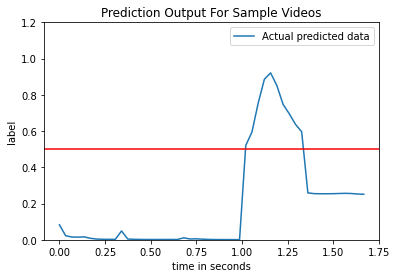

In [225]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial213/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


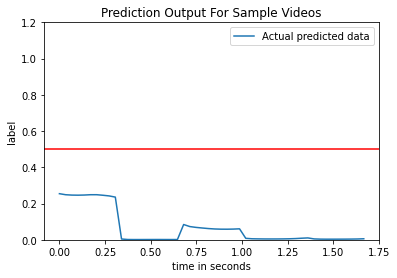

In [226]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial214/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


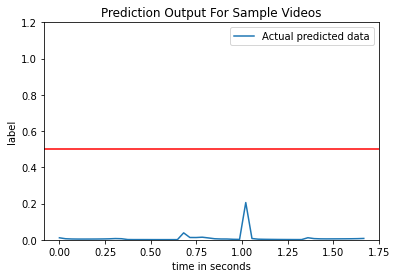

In [227]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial215/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


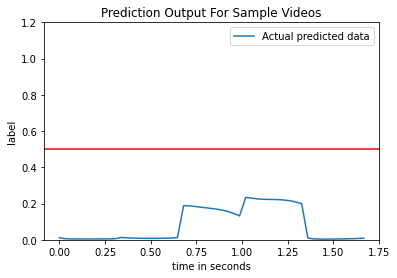

In [228]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial216/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


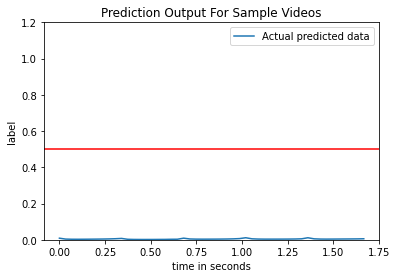

In [229]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial217/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


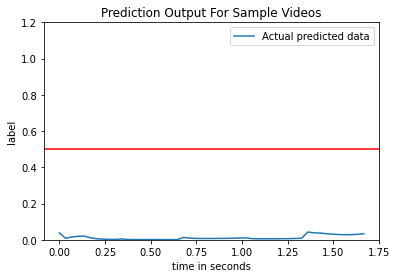

In [230]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial218/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


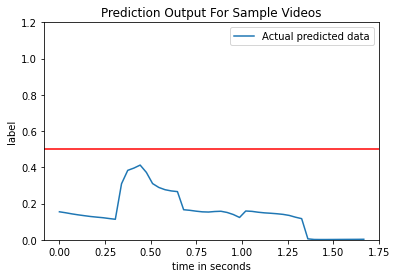

In [231]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial219/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


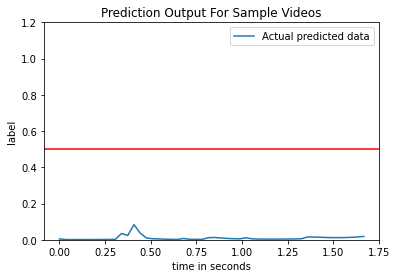

In [232]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial220/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


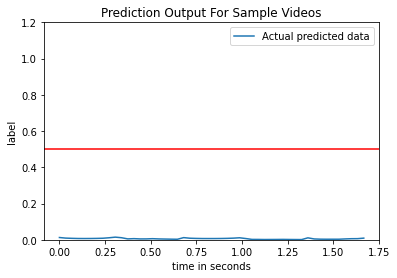

In [233]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial221/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


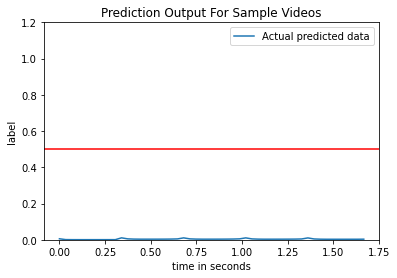

In [234]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial222/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


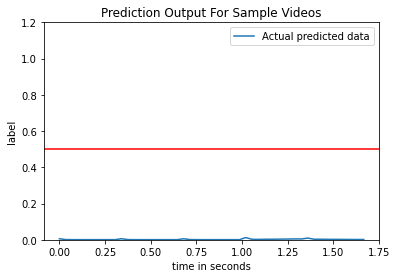

In [235]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial223/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


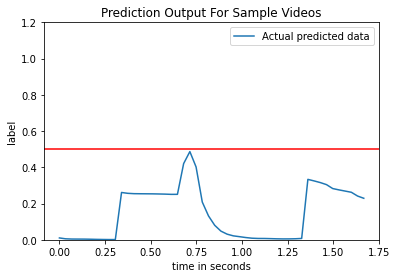

In [236]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial224/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


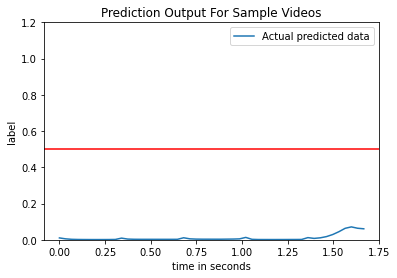

In [237]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial225/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


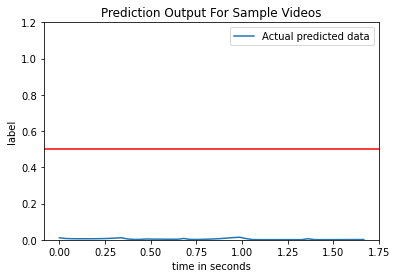

In [238]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial226/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


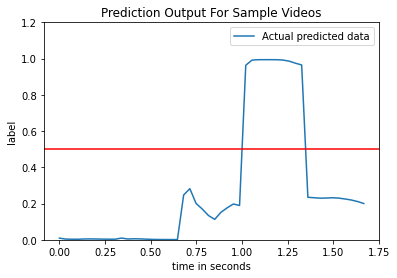

In [239]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial227/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


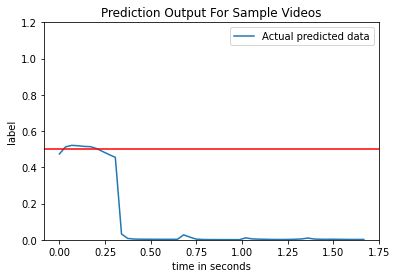

In [240]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial228/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


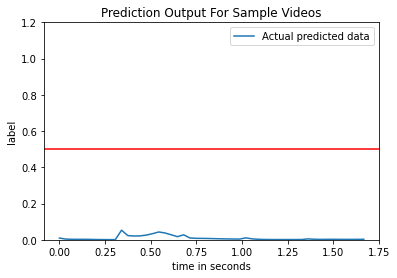

In [241]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial229/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


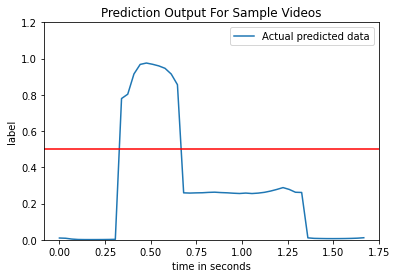

In [242]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial230/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


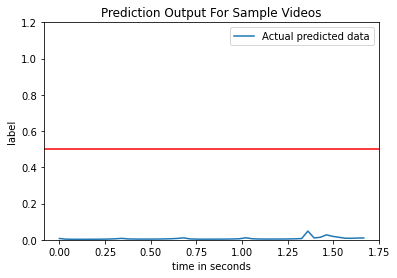

In [243]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial231/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


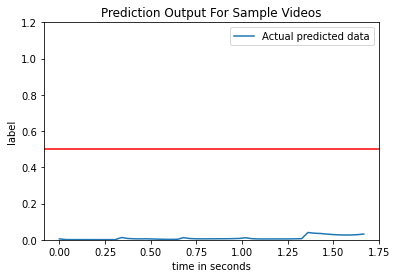

In [244]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial232/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


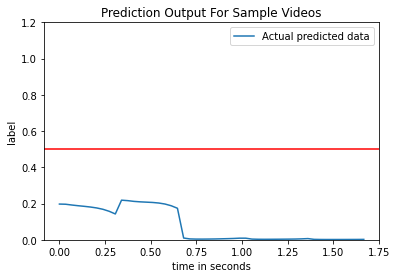

In [245]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial233/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


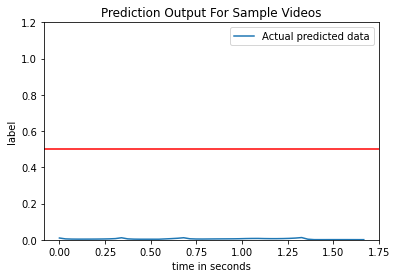

In [246]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial234/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


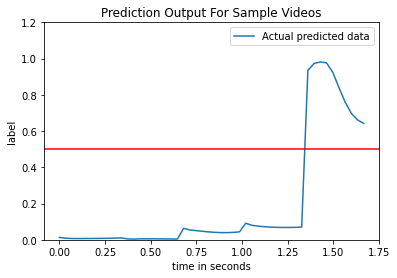

In [247]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial235/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


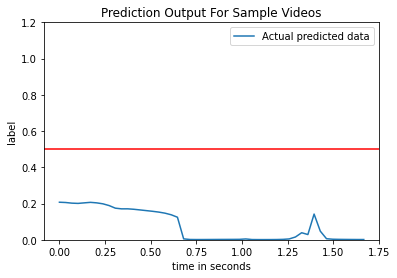

In [248]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial236/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


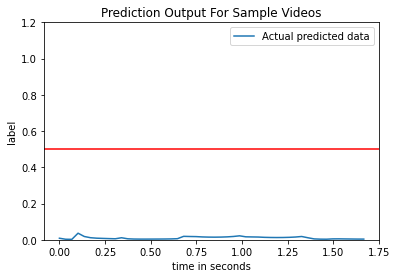

In [249]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial237/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


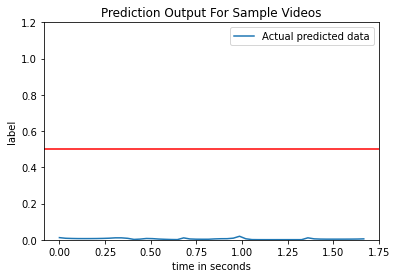

In [250]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial238/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


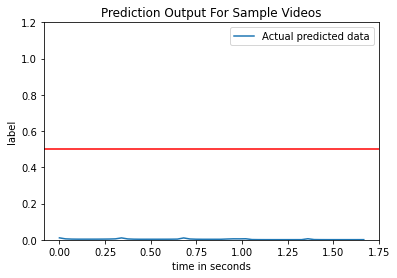

In [251]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial239/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


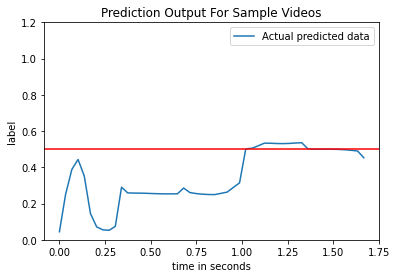

In [252]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial241/*'  #change json file for different test videos
predict(file_name_json)

(48, 50)
(40, 50)


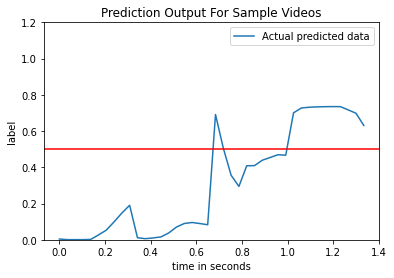

In [253]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial242/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


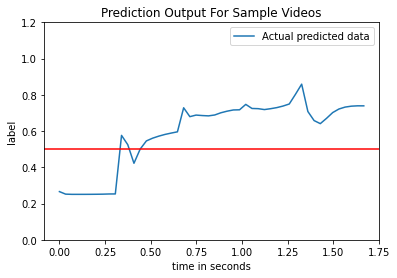

In [254]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial243/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


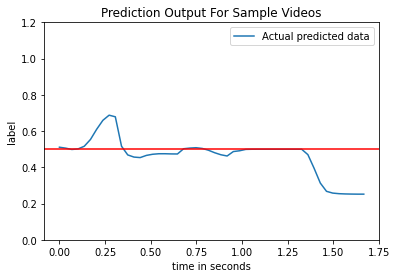

In [255]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial244/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


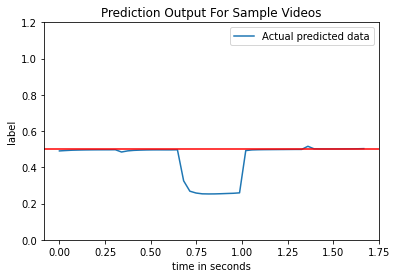

In [256]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial245/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


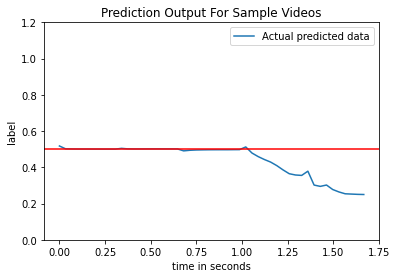

In [257]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial246/*'  #change json file for different test videos
predict(file_name_json)

(48, 50)
(40, 50)


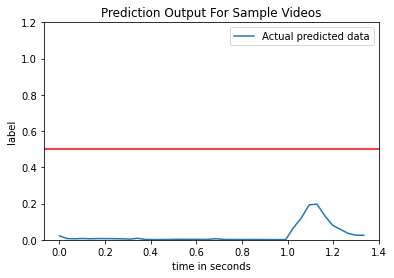

In [258]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial247/*'  #change json file for different test videos
predict(file_name_json)

(49, 50)
(40, 50)


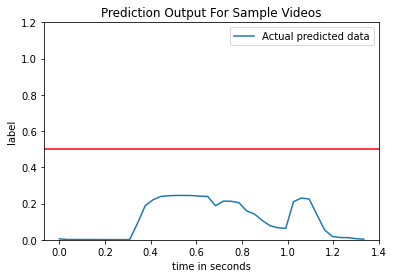

In [259]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial248/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


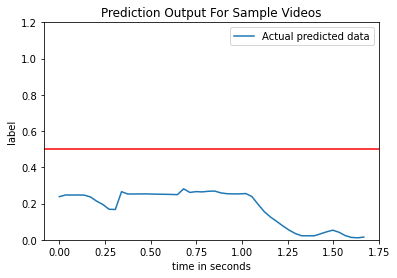

In [260]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial249/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


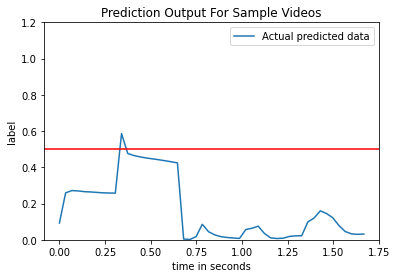

In [261]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial250/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


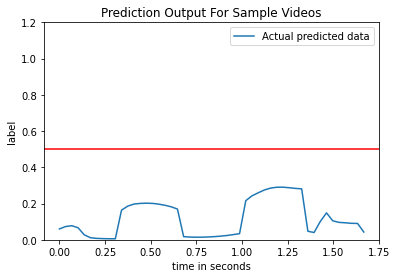

In [262]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial251/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


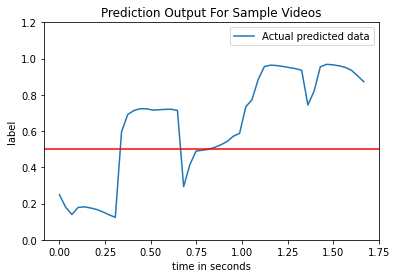

In [263]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial252/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


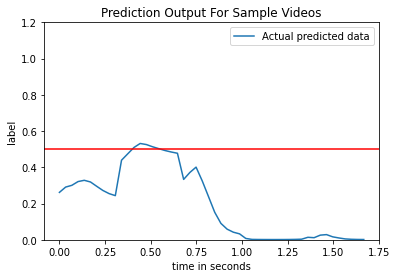

In [264]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial253/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


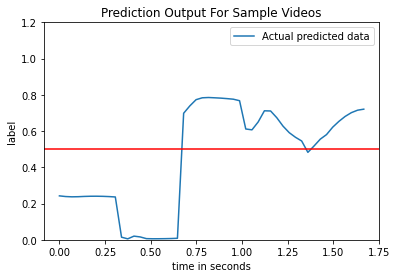

In [265]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial254/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


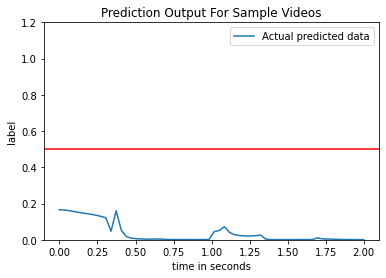

In [266]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial255/*'  #change json file for different test videos
predict(file_name_json)

(60, 50)
(60, 50)


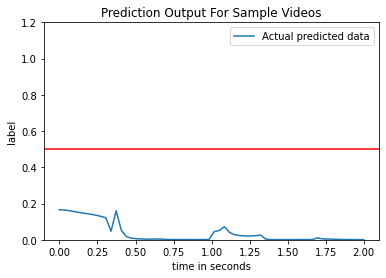

In [267]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial256/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


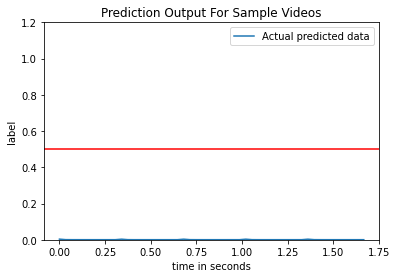

In [268]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial257/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


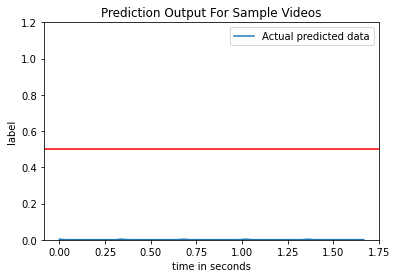

In [269]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial258/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


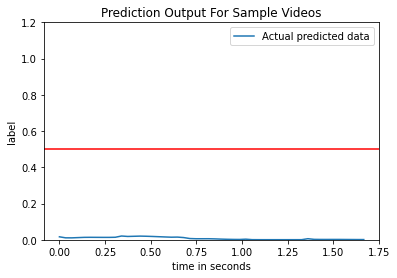

In [270]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial259/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


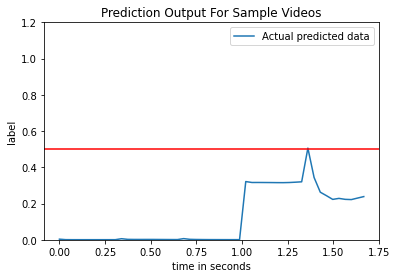

In [271]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial260/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


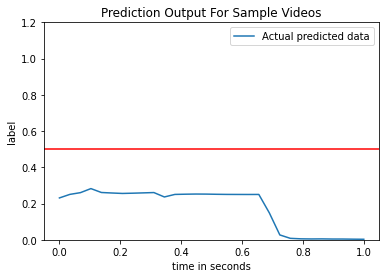

In [272]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial261/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


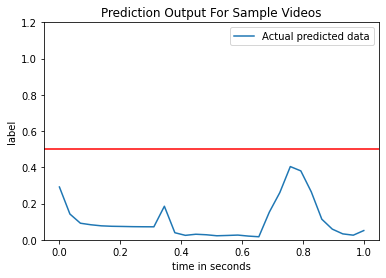

In [273]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial262/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


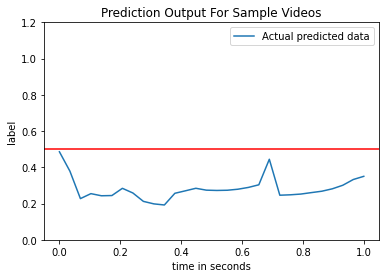

In [274]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial263/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


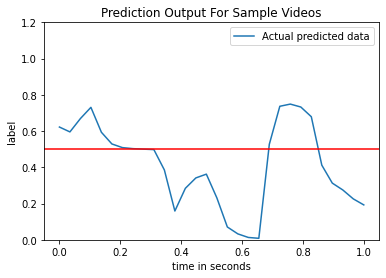

In [275]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial264/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


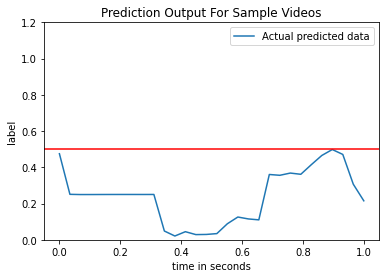

In [276]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial265/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


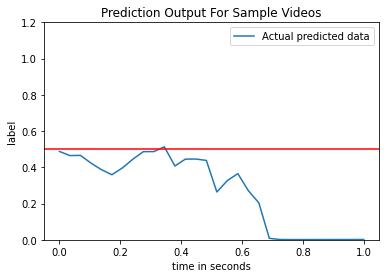

In [277]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial266/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


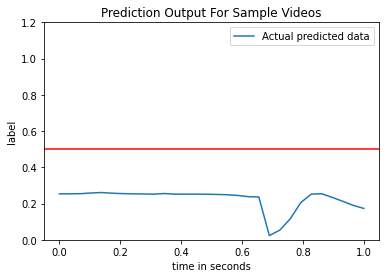

In [278]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial267/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


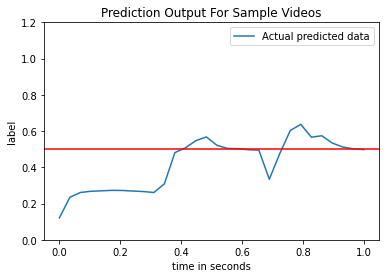

In [279]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial268/*'  #change json file for different test videos
predict(file_name_json)

(27, 50)
(20, 50)


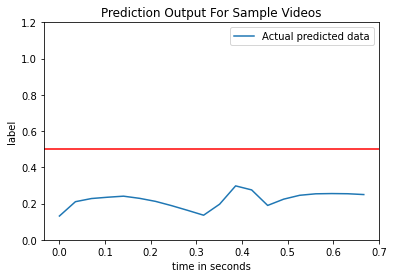

In [280]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial269/*'  #change json file for different test videos
predict(file_name_json)

(29, 50)
(20, 50)


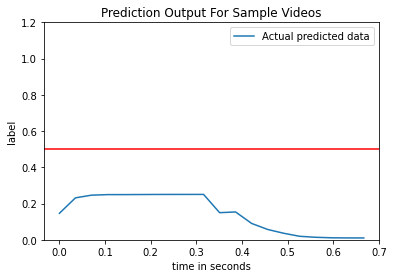

In [281]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial270/*'  #change json file for different test videos
predict(file_name_json)

(30, 50)
(30, 50)


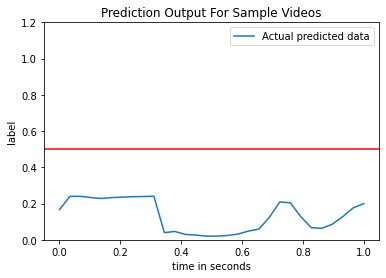

In [282]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial271/*'  #change json file for different test videos
predict(file_name_json)

(25, 50)
(20, 50)


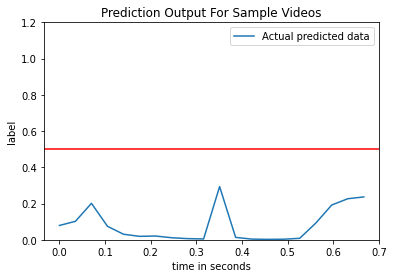

In [283]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial272/*'  #change json file for different test videos
predict(file_name_json)

(26, 50)
(20, 50)


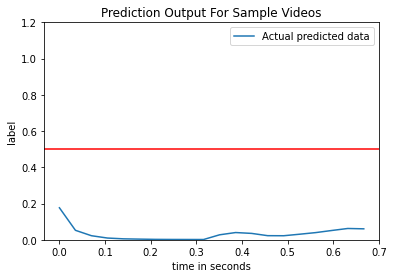

In [284]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial273/*'  #change json file for different test videos
predict(file_name_json)

(13, 50)
(10, 50)


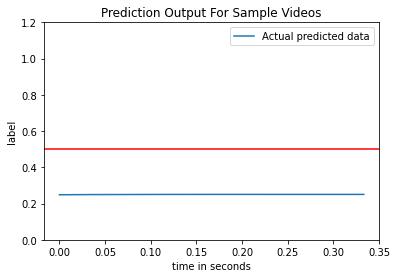

In [285]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial274/*'  #change json file for different test videos
predict(file_name_json)

(26, 50)
(20, 50)


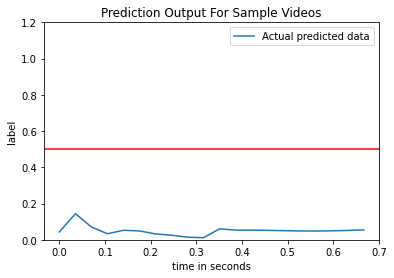

In [286]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial275/*'  #change json file for different test videos
predict(file_name_json)

In [287]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial276/*'  #change json file for different test videos
# predict(file_name_json)

(39, 50)
(30, 50)


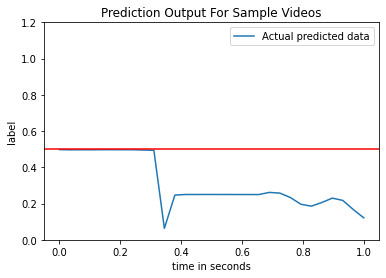

In [288]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial277/*'  #change json file for different test videos
predict(file_name_json)

(49, 50)
(40, 50)


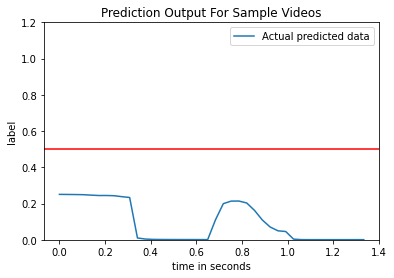

In [289]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial278/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


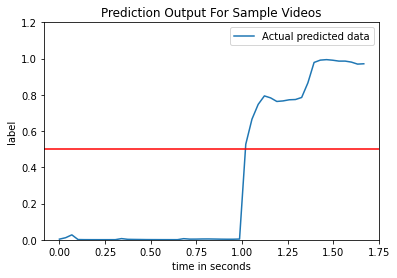

In [290]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial279/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


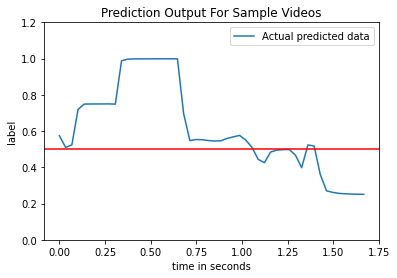

In [291]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial280/*'  #change json file for different test videos
predict(file_name_json)

(48, 50)
(40, 50)


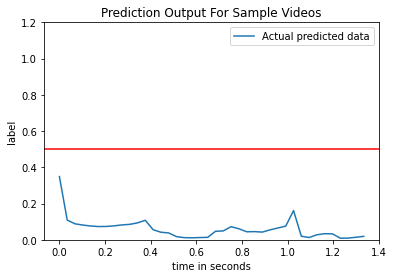

In [292]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial281/*'  #change json file for different test videos
predict(file_name_json)

(47, 50)
(40, 50)


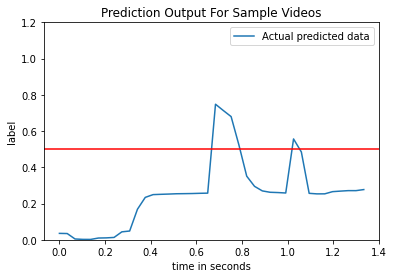

In [293]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial282/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


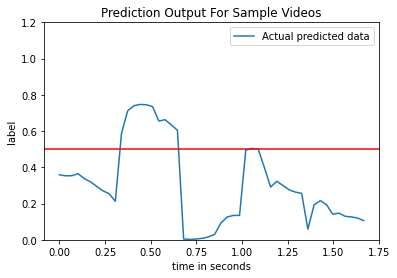

In [294]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial283/*'  #change json file for different test videos
predict(file_name_json)

(49, 50)
(40, 50)


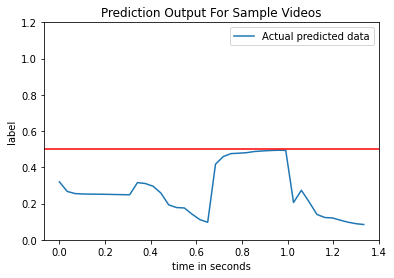

In [295]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial284/*'  #change json file for different test videos
predict(file_name_json)

In [296]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial285/*'  #change json file for different test videos
# predict(file_name_json)

In [297]:
# file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial286/*'  #change json file for different test videos
# predict(file_name_json)

(27, 50)
(20, 50)


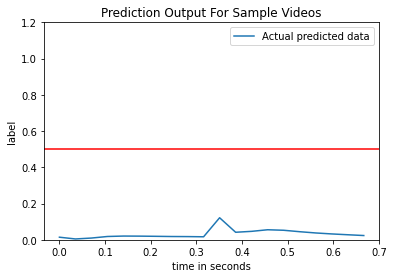

In [298]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial287/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


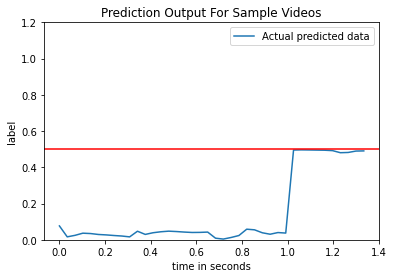

In [299]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial288/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


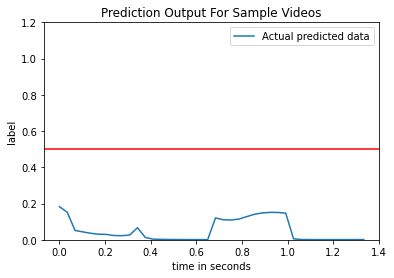

In [300]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial289/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


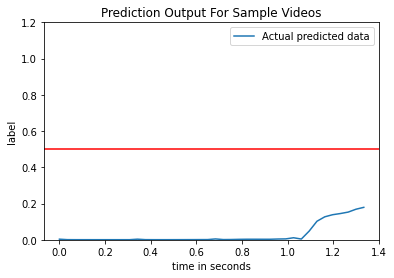

In [301]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial290/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


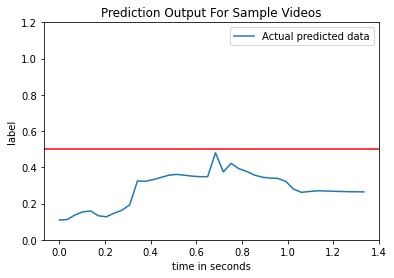

In [302]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial291/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


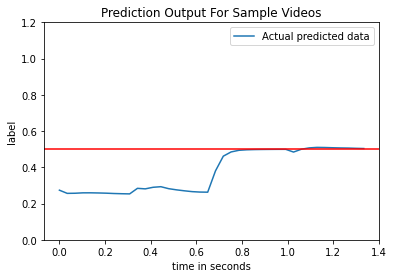

In [303]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial292/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


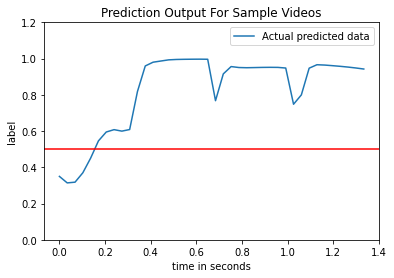

In [304]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial293/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


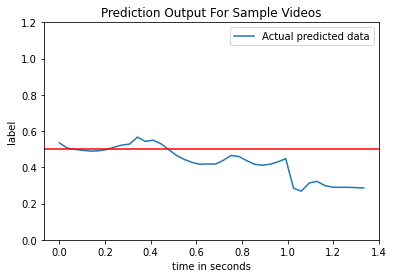

In [305]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial294/*'  #change json file for different test videos
predict(file_name_json)

(39, 50)
(30, 50)


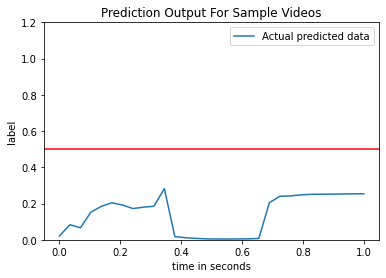

In [306]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial295/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


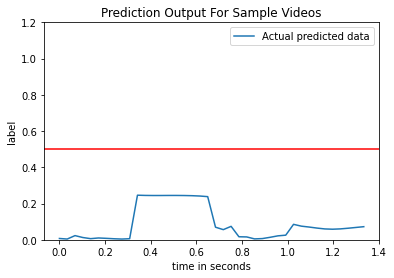

In [307]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial296/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


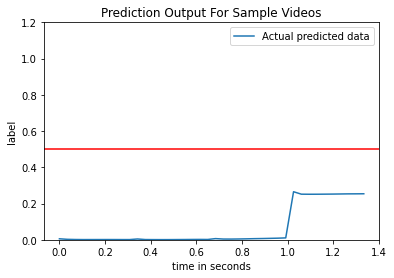

In [308]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial297/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


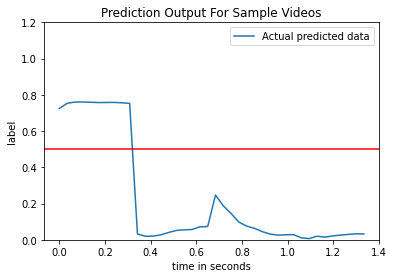

In [309]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial298/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


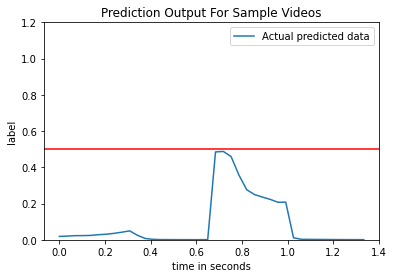

In [310]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial299/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


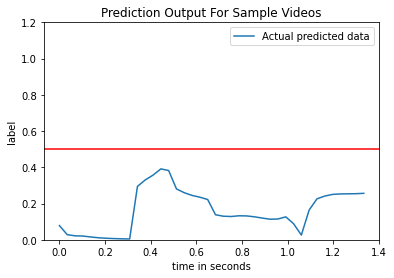

In [311]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial300/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


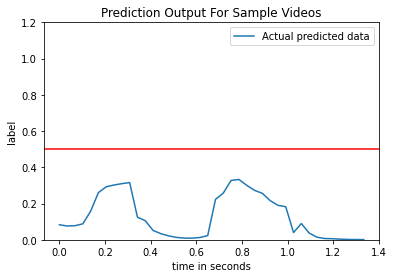

In [312]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial301/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


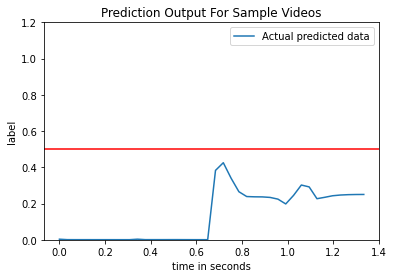

In [313]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial302/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


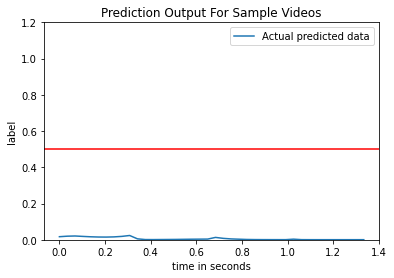

In [314]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial303/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


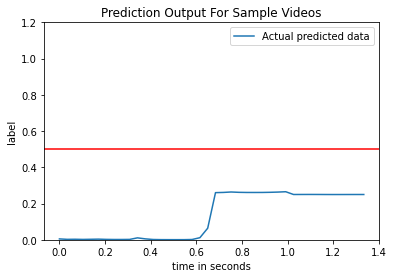

In [315]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial304/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


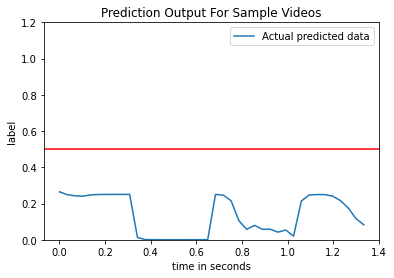

In [316]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial305/*'  #change json file for different test videos
predict(file_name_json)

(33, 50)
(30, 50)


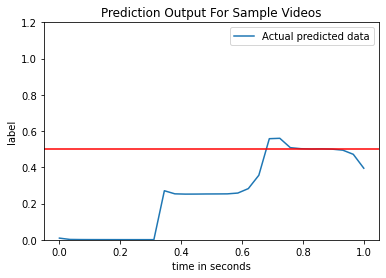

In [317]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial306/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


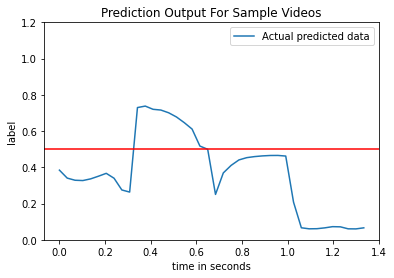

In [318]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial307/*'  #change json file for different test videos
predict(file_name_json)

(33, 50)
(30, 50)


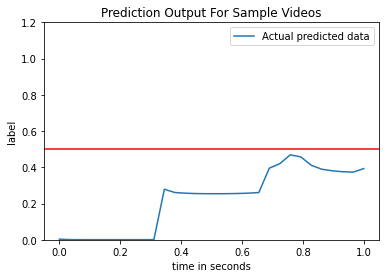

In [319]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial308/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


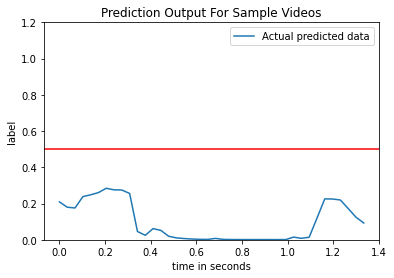

In [320]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial309/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


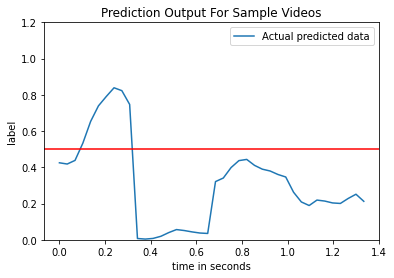

In [321]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial310/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


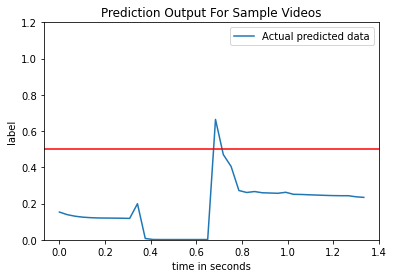

In [322]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial311/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


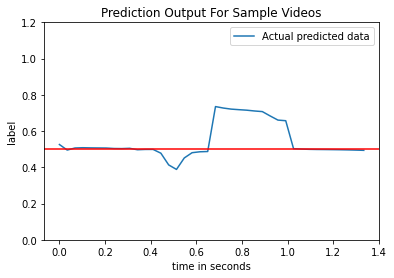

In [323]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial312/*'  #change json file for different test videos
predict(file_name_json)

(37, 50)
(30, 50)


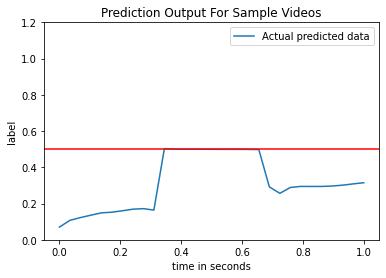

In [324]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial313/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


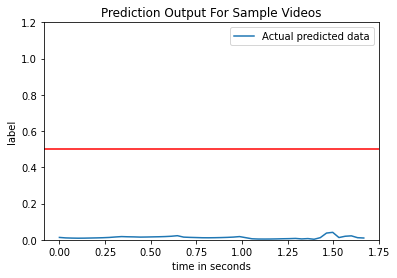

In [325]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial314/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


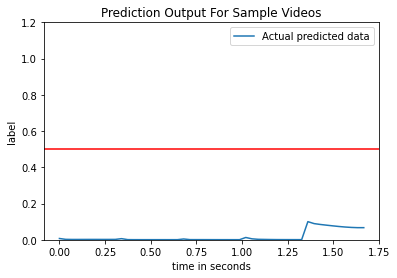

In [326]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial315/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


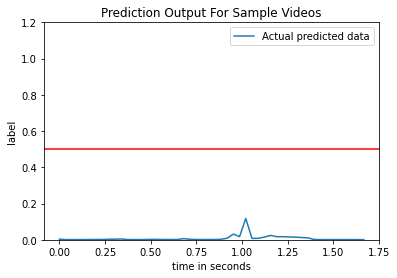

In [327]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial316/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


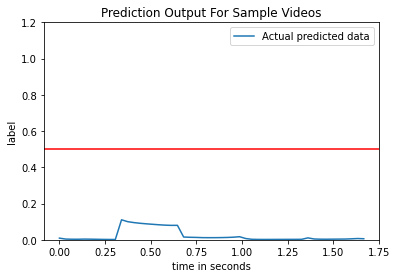

In [328]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial317/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


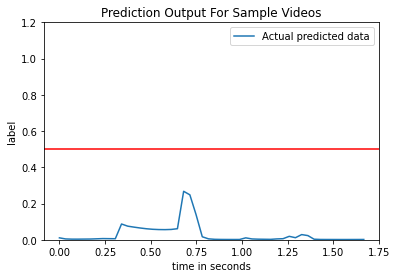

In [329]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial318/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


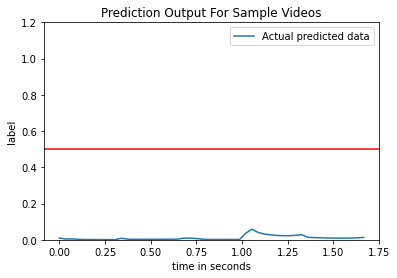

In [330]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial319/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


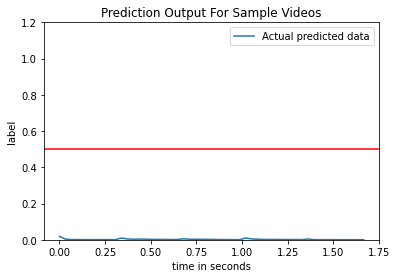

In [331]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial320/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


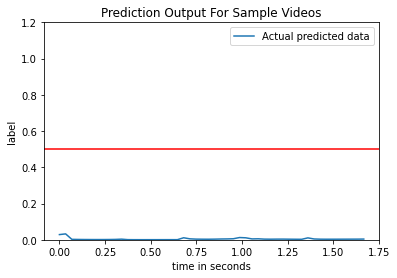

In [332]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial321/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


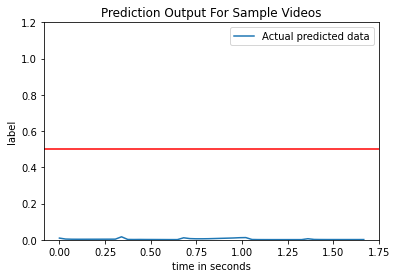

In [333]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial322/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


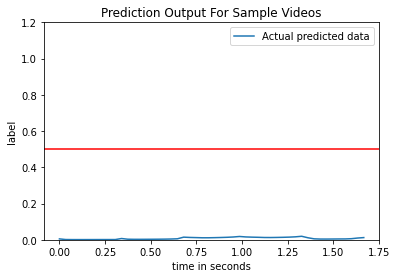

In [334]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial323/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


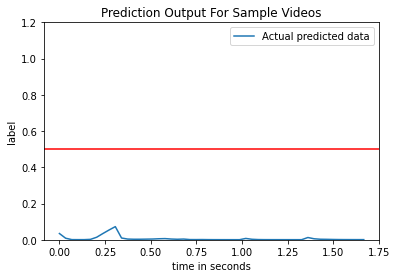

In [335]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial324/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


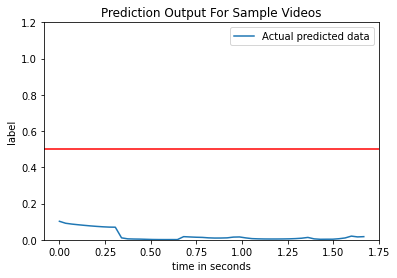

In [336]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial325/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


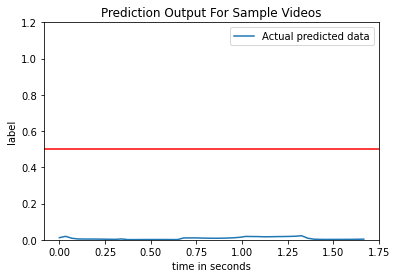

In [337]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial326/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


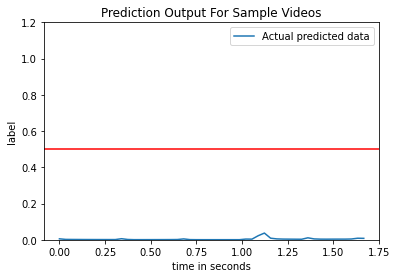

In [338]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial327/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


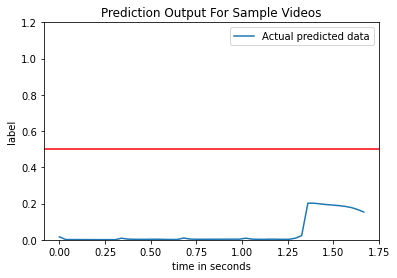

In [339]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial328/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


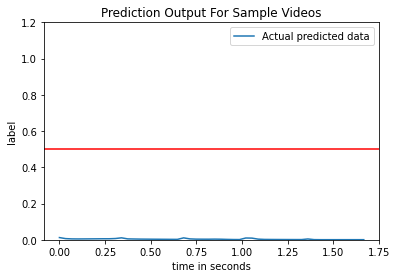

In [340]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial329/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


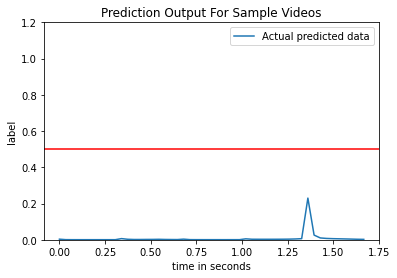

In [341]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial330/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


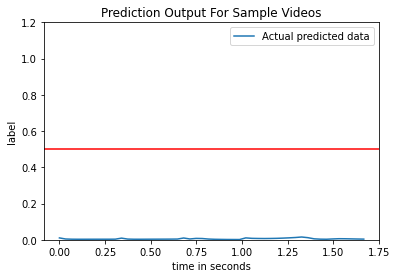

In [342]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial331/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


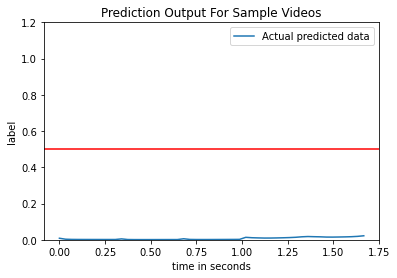

In [343]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial332/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


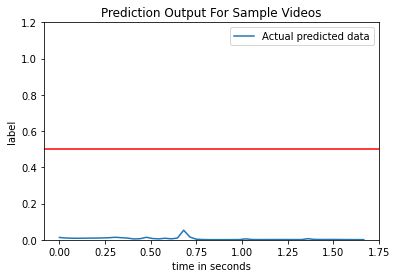

In [344]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial333/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


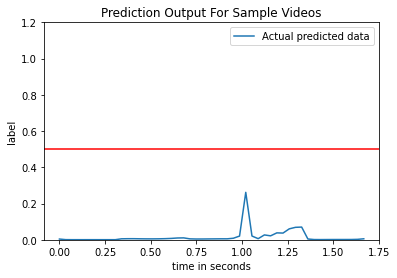

In [345]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial334/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


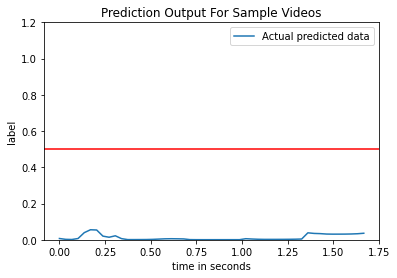

In [346]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial335/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


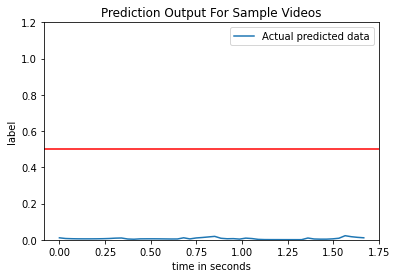

In [347]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial336/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


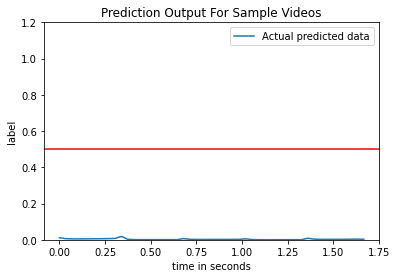

In [348]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial337/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


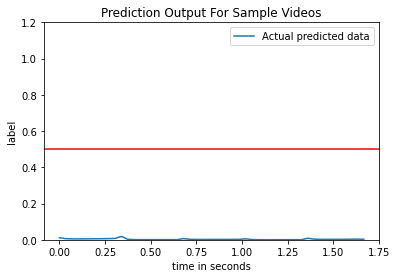

In [349]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial338/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


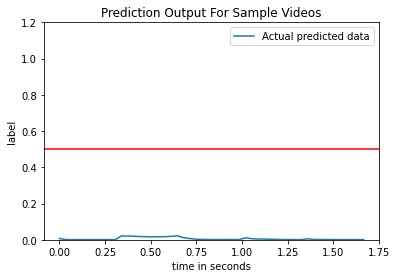

In [350]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial339/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


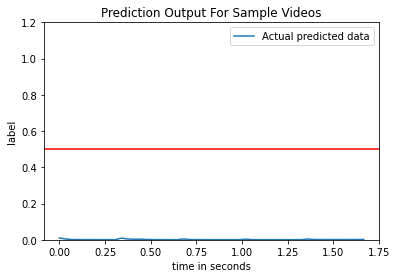

In [351]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial340/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


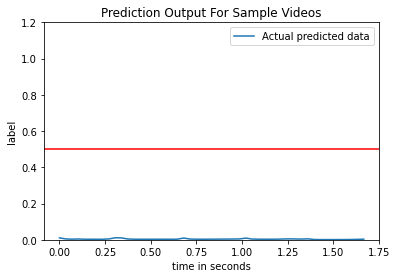

In [352]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial341/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


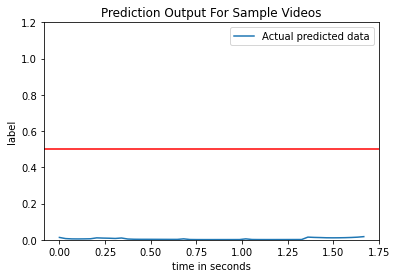

In [353]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial342/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


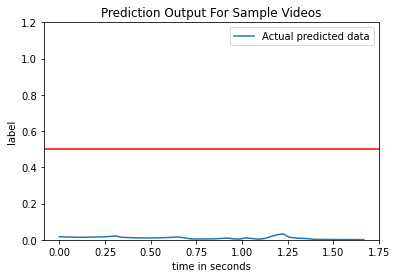

In [354]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial343/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


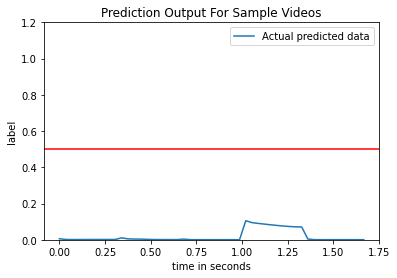

In [355]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial344/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


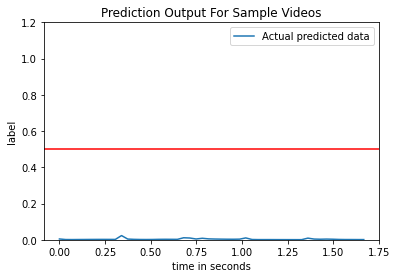

In [356]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial345/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


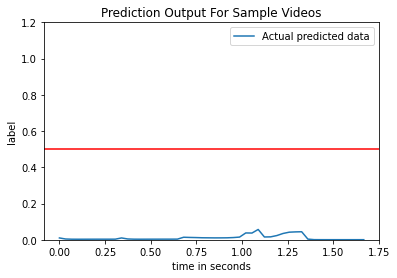

In [357]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial346/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


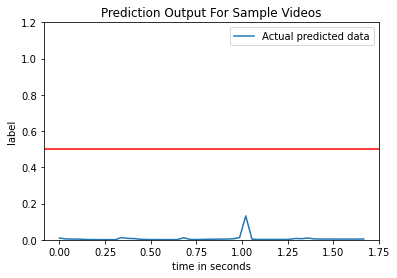

In [358]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial347/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


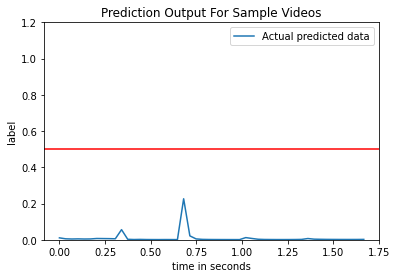

In [359]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial348/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


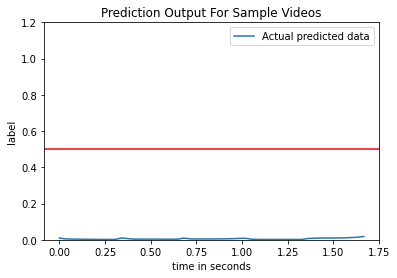

In [360]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial349/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


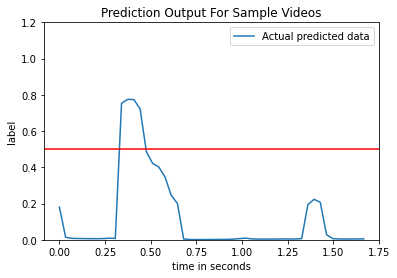

In [361]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial350/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


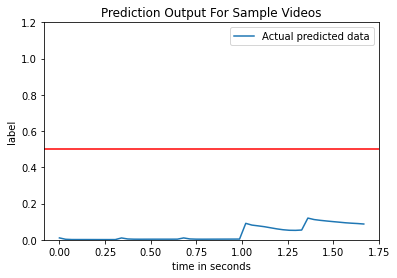

In [362]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial351/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


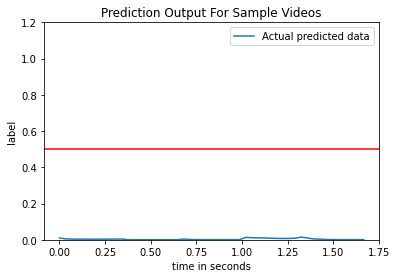

In [363]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial352/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


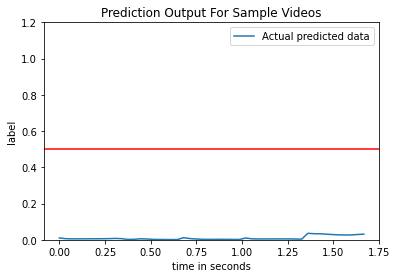

In [364]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial353/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


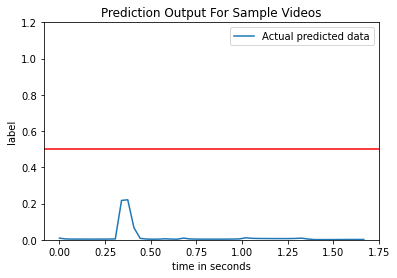

In [365]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial354/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


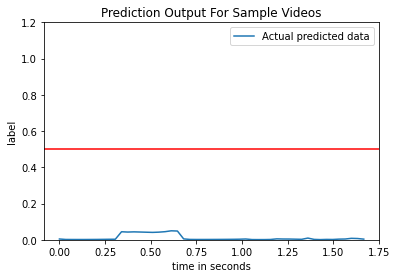

In [366]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial355/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


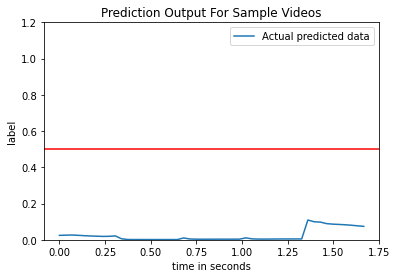

In [367]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial356/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


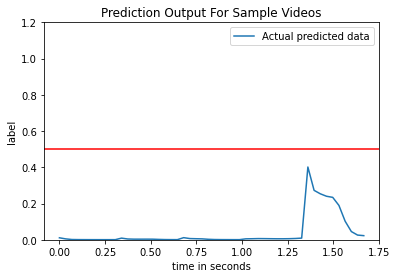

In [368]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial357/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


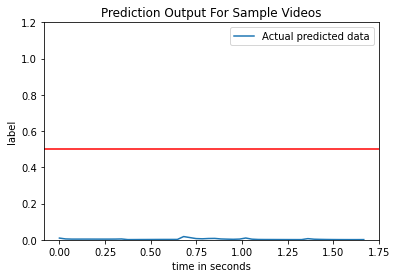

In [369]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial358/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


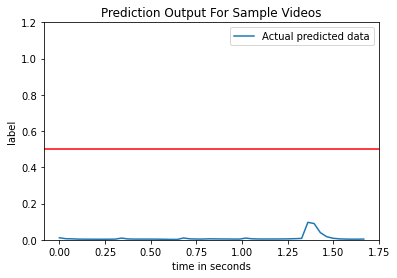

In [370]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial359/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


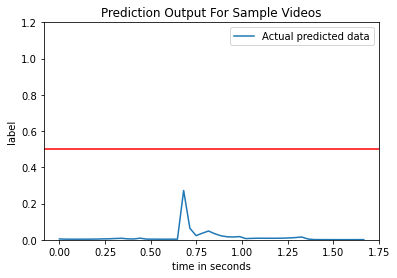

In [371]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial360/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


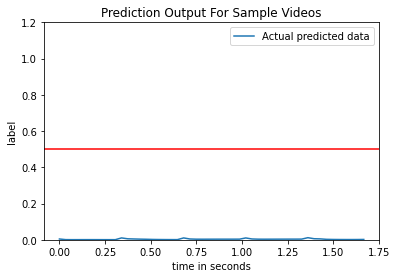

In [372]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial361/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


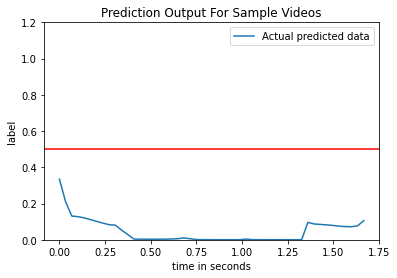

In [373]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial362/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


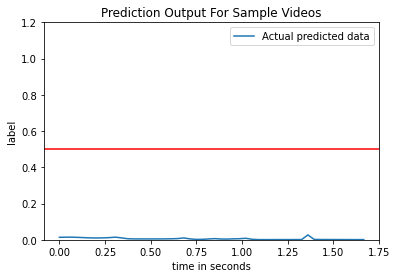

In [374]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial363/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


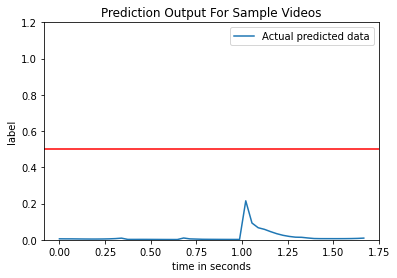

In [375]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial364/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


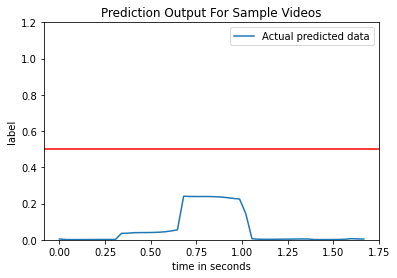

In [376]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial365/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


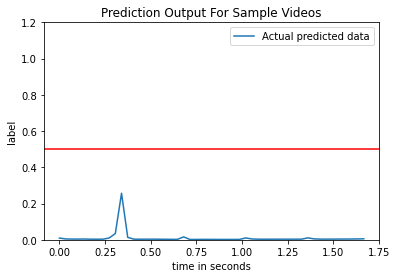

In [377]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial366/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


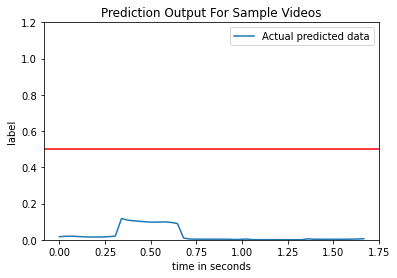

In [378]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial367/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


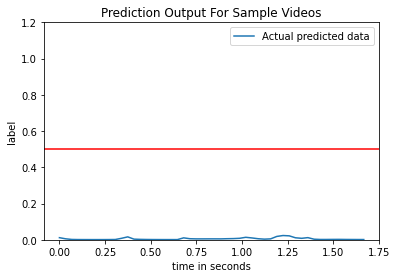

In [379]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial368/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


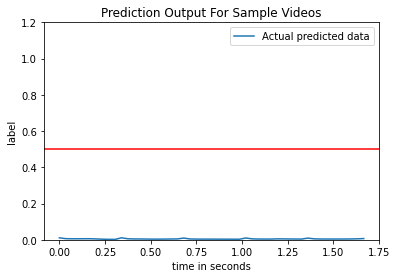

In [380]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial369/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


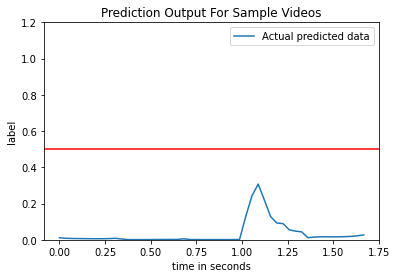

In [381]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial370/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


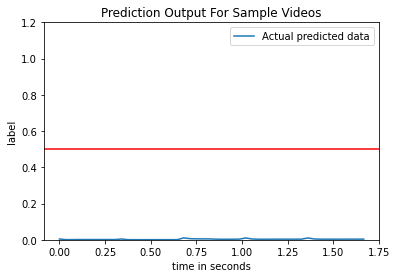

In [382]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial371/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


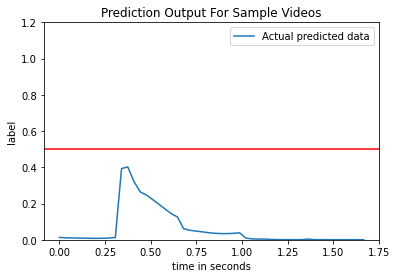

In [383]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial372/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


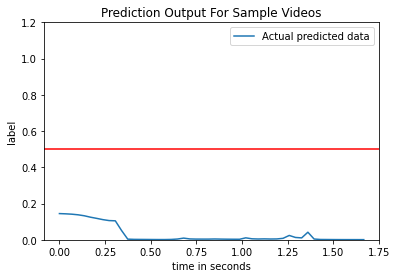

In [384]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial373/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


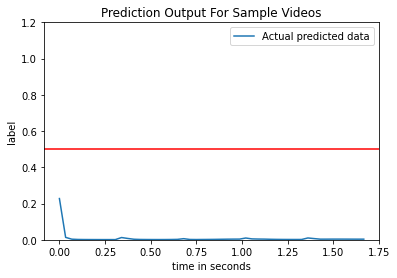

In [385]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial374/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


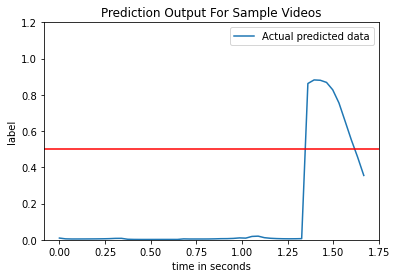

In [386]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial375/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


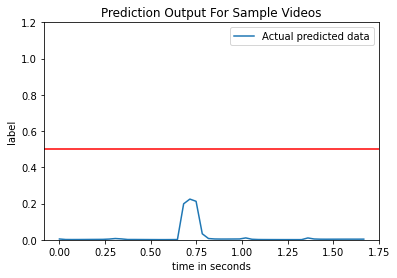

In [387]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial376/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


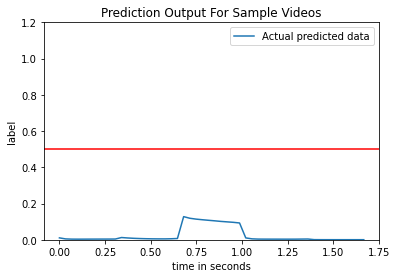

In [388]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial377/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


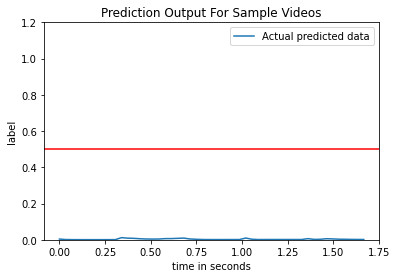

In [389]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial378/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


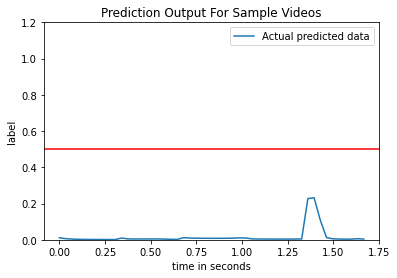

In [390]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial379/*'  #change json file for different test videos
predict(file_name_json)

(50, 50)
(50, 50)


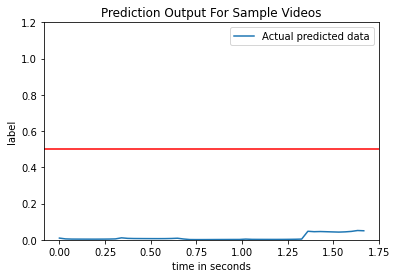

In [391]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial380/*'  #change json file for different test videos
predict(file_name_json)

(40, 50)
(40, 50)


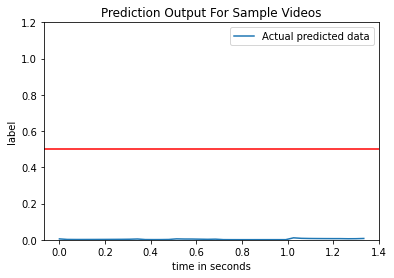

In [392]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission10/Trial381/*'  #change json file for different test videos
predict(file_name_json)